### Problem 1: Linear Regression
The comp-activ databases is a collection of a computer systems activity measures .
The data was collected from a Sun Sparcstation 20/712 with 128 Mbytes of memory running in a multi-user university department. Users would typically be doing a large variety of tasks ranging from accessing the internet, editing files or running very cpu-bound programs. 
As you are a budding data scientist you thought to find out a linear equation to build a model to predict 'usr'(Portion of time (%) that cpus run in user mode) and to find out how each attribute affects the system to be in 'usr' mode using a list of system attributes.
 
DATA DICTIONARY COMPACTIVE:
System measures used:
- lread - Reads (transfers per second ) between system memory and user memory
- lwrite - writes (transfers per second) between system memory and user memory
- scall - Number of system calls of all types per second
- sread - Number of system read calls per second .
- swrite - Number of system write calls per second .
- fork - Number of system fork calls per second.
- exec - Number of system exec calls per second.
- rchar - Number of characters transferred per second by system read calls
- wchar - Number of characters transfreed per second by system write calls
- pgout - Number of page out requests per second
- ppgout - Number of pages, paged out per second
- pgfree - Number of pages per second placed on the free list.
- pgscan - Number of pages checked if they can be freed per second
- atch - Number of page attaches (satisfying a page fault by reclaiming a page in memory) per second
- pgin - Number of page-in requests per second
- ppgin - Number of pages paged in per second
- pflt - Number of page faults caused by protection errors (copy-on-writes).
- vflt - Number of page faults caused by address translation .
- runqsz - Process run queue size (The number of kernel threads in memory that are waiting for a CPU to run.
- Typically, this value should be less than 2. Consistently higher values mean that the system might be CPU-bound.)
- freemem - Number of memory pages available to user processes
- freeswap - Number of disk blocks available for page swapping.
- usr - Portion of time (%) that cpus run in user mode


### 1.1 Read the data and do exploratory data analysis. Describe the data briefly. (Check the Data types, shape, EDA, 5 point summary). Perform Univariate, Bivariate Analysis, Multivariate Analysis.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the dataset for our first problem
df= pd.read_excel("compactiv.xlsx")

In [3]:
df.head()

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgout,...,pgscan,atch,pgin,ppgin,pflt,vflt,runqsz,freemem,freeswap,usr
0,1,0,2147,79,68,0.2,0.2,40671.0,53995.0,0.0,...,0.0,0.0,1.6,2.6,16.00,26.40,CPU_Bound,4670,1730946,95
1,0,0,170,18,21,0.2,0.2,448.0,8385.0,0.0,...,0.0,0.0,0.0,0.0,15.63,16.83,Not_CPU_Bound,7278,1869002,97
2,15,3,2162,159,119,2.0,2.4,NaN,31950.0,0.0,...,0.0,1.2,6.0,9.4,150.20,220.20,Not_CPU_Bound,702,1021237,87
3,0,0,160,12,16,0.2,0.2,NaN,8670.0,0.0,...,0.0,0.0,0.2,0.2,15.60,16.80,Not_CPU_Bound,7248,1863704,98
4,5,1,330,39,38,0.4,0.4,NaN,12185.0,0.0,...,0.0,0.0,1.0,1.2,37.80,47.60,Not_CPU_Bound,633,1760253,90


In [4]:
df.shape

(8192, 22)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lread     8192 non-null   int64  
 1   lwrite    8192 non-null   int64  
 2   scall     8192 non-null   int64  
 3   sread     8192 non-null   int64  
 4   swrite    8192 non-null   int64  
 5   fork      8192 non-null   float64
 6   exec      8192 non-null   float64
 7   rchar     8088 non-null   float64
 8   wchar     8177 non-null   float64
 9   pgout     8192 non-null   float64
 10  ppgout    8192 non-null   float64
 11  pgfree    8192 non-null   float64
 12  pgscan    8192 non-null   float64
 13  atch      8192 non-null   float64
 14  pgin      8192 non-null   float64
 15  ppgin     8192 non-null   float64
 16  pflt      8192 non-null   float64
 17  vflt      8192 non-null   float64
 18  runqsz    8192 non-null   object 
 19  freemem   8192 non-null   int64  
 20  freeswap  8192 non-null   int6

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
lread,8192.0,1.955969e+01,53.353799,0.0,2.0,7.0,20.000,1845.00
lwrite,8192.0,1.310620e+01,29.891726,0.0,0.0,1.0,10.000,575.00
scall,8192.0,2.306318e+03,1633.617322,109.0,1012.0,2051.5,3317.250,12493.00
sread,8192.0,2.104800e+02,198.980146,6.0,86.0,166.0,279.000,5318.00
swrite,8192.0,1.500582e+02,160.478980,7.0,63.0,117.0,185.000,5456.00
fork,8192.0,1.884554e+00,2.479493,0.0,0.4,0.8,2.200,20.12
exec,8192.0,2.791998e+00,5.212456,0.0,0.2,1.2,2.800,59.56
rchar,8088.0,1.973857e+05,239837.493526,278.0,34091.5,125473.5,267828.750,2526649.00
wchar,8177.0,9.590299e+04,140841.707911,1498.0,22916.0,46619.0,106101.000,1801623.00
pgout,8192.0,2.285317e+00,5.307038,0.0,0.0,0.0,2.400,81.44


In [7]:
df.columns

Index(['lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar',
       'wchar', 'pgout', 'ppgout', 'pgfree', 'pgscan', 'atch', 'pgin', 'ppgin',
       'pflt', 'vflt', 'runqsz', 'freemem', 'freeswap', 'usr'],
      dtype='object')

<AxesSubplot:xlabel='lread'>

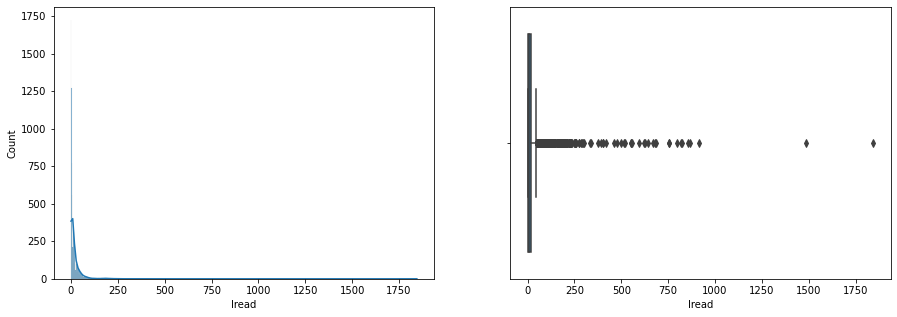

In [8]:
fig,axs = plt.subplots(nrows = 1, ncols= 2, figsize = (15,5))
sns.histplot(df["lread"],kde=True, ax = axs[0])
sns.boxplot(df["lread"], ax = axs[1])

In [9]:
df["lread"].skew()

13.897852242774922

In [10]:
ZerosIn_lread=(df[df["lread"]==0].shape[0]/df.shape[0])*100
print("{} % of records of lread is equal to 0".format(round(ZerosIn_lread,2)))

8.24 % of records of lread is equal to 0


In [11]:
df['lread'].describe()

count    8192.000000
mean       19.559692
std        53.353799
min         0.000000
25%         2.000000
50%         7.000000
75%        20.000000
max      1845.000000
Name: lread, dtype: float64

<AxesSubplot:xlabel='lwrite'>

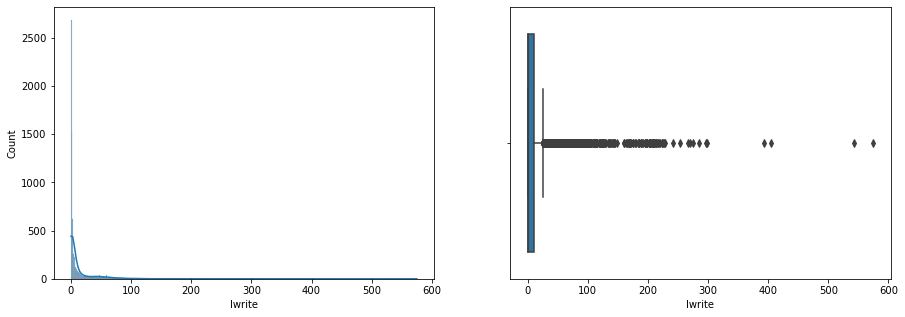

In [12]:
fig,axs = plt.subplots(nrows = 1, ncols= 2, figsize = (15,5))
sns.histplot(df["lwrite"],kde=True, ax = axs[0])
sns.boxplot(df["lwrite"], ax = axs[1])

In [13]:
df["lwrite"].skew()

5.27764452621306

<AxesSubplot:xlabel='scall'>

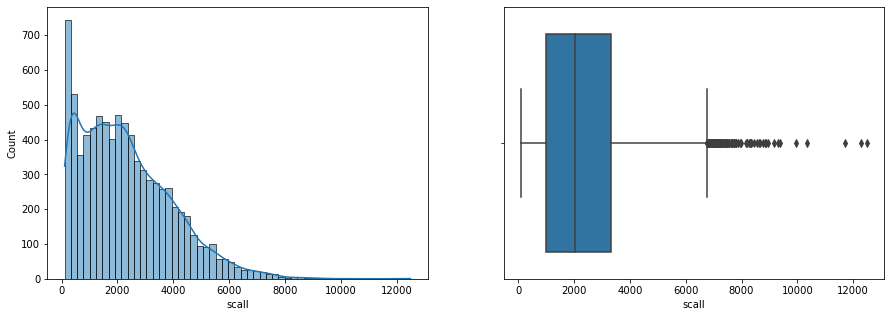

In [14]:
fig,axs = plt.subplots(nrows = 1, ncols= 2, figsize = (15,5))
sns.histplot(df["scall"],kde=True, ax = axs[0])
sns.boxplot(df["scall"], ax = axs[1])

In [15]:
df["scall"].skew()

0.9025312213201333

<AxesSubplot:xlabel='sread'>

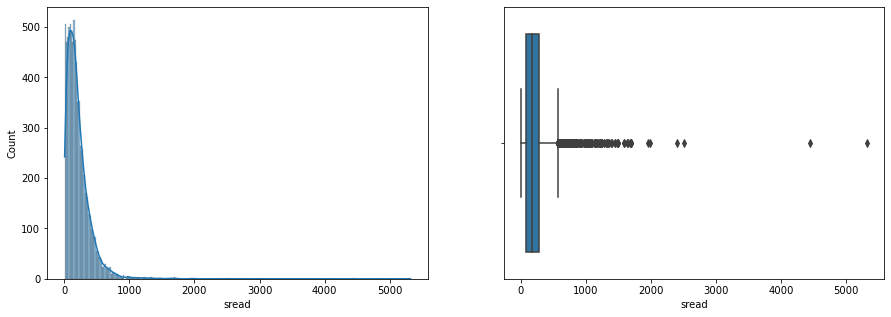

In [16]:
fig,axs = plt.subplots(nrows = 1, ncols= 2, figsize = (15,5))
sns.histplot(df["sread"],kde=True, ax = axs[0])
sns.boxplot(df["sread"], ax = axs[1])

In [17]:
df["sread"].describe()

count    8192.000000
mean      210.479980
std       198.980146
min         6.000000
25%        86.000000
50%       166.000000
75%       279.000000
max      5318.000000
Name: sread, dtype: float64

In [18]:
df["sread"].skew()

5.459465962452425

<AxesSubplot:xlabel='swrite'>

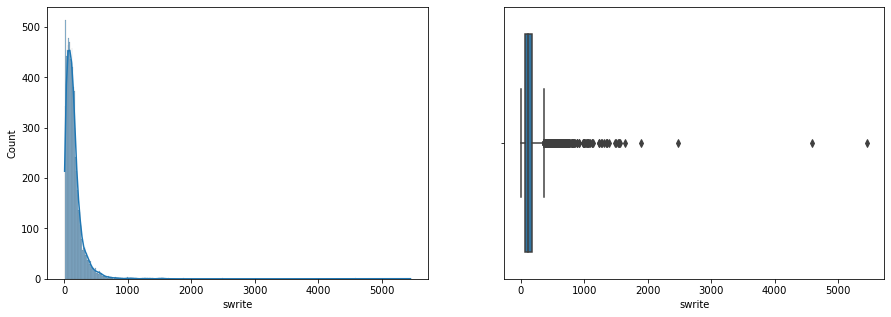

In [19]:
fig,axs = plt.subplots(nrows = 1, ncols= 2, figsize = (15,5))
sns.histplot(df["swrite"],kde=True, ax = axs[0])
sns.boxplot(df["swrite"], ax = axs[1])

In [20]:
df["swrite"].describe()

count    8192.000000
mean      150.058228
std       160.478980
min         7.000000
25%        63.000000
50%       117.000000
75%       185.000000
max      5456.000000
Name: swrite, dtype: float64

In [21]:
df["swrite"].skew()

9.605843698195871

<AxesSubplot:xlabel='fork'>

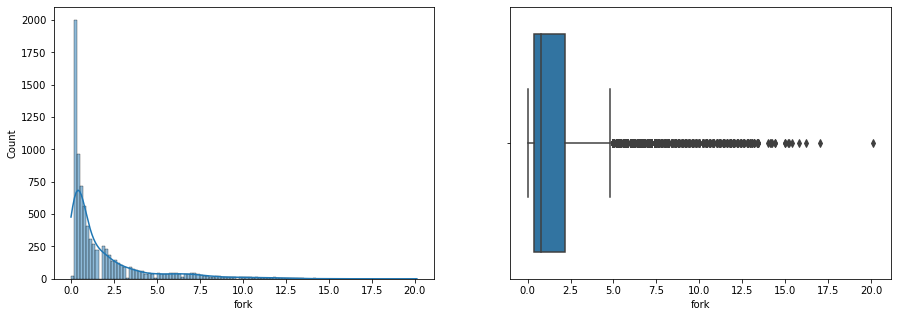

In [22]:
fig,axs = plt.subplots(nrows = 1, ncols= 2, figsize = (15,5))
sns.histplot(df["fork"],kde=True, ax = axs[0])
sns.boxplot(df["fork"], ax = axs[1])

In [23]:
df["fork"].describe()

count    8192.000000
mean        1.884554
std         2.479493
min         0.000000
25%         0.400000
50%         0.800000
75%         2.200000
max        20.120000
Name: fork, dtype: float64

In [24]:
df["fork"].skew()

2.2496891391571325

<AxesSubplot:xlabel='exec'>

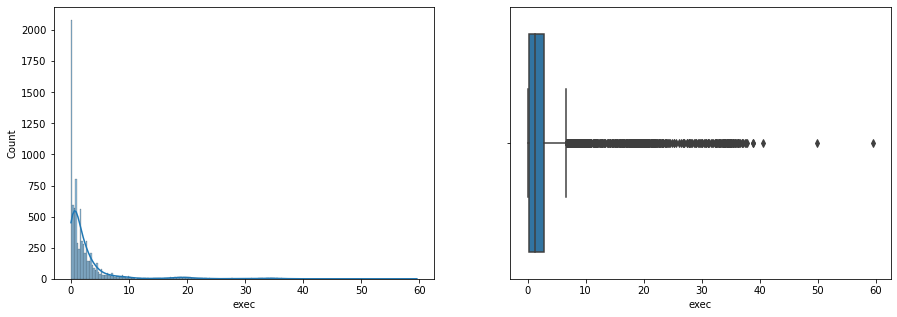

In [25]:
fig,axs = plt.subplots(nrows = 1, ncols= 2, figsize = (15,5))
sns.histplot(df["exec"],kde=True, ax = axs[0])
sns.boxplot(df["exec"], ax = axs[1])

In [26]:
df["exec"].describe()

count    8192.000000
mean        2.791998
std         5.212456
min         0.000000
25%         0.200000
50%         1.200000
75%         2.800000
max        59.560000
Name: exec, dtype: float64

In [27]:
df["exec"].skew()

4.069237707552533

<AxesSubplot:xlabel='rchar'>

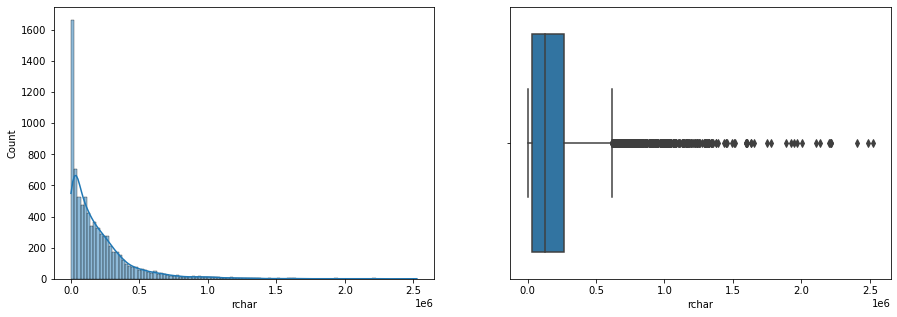

In [28]:
fig,axs = plt.subplots(nrows = 1, ncols= 2, figsize = (15,5))
sns.histplot(df["rchar"],kde=True, ax = axs[0])
sns.boxplot(df["rchar"], ax = axs[1])

In [29]:
df["rchar"].describe()

count    8.088000e+03
mean     1.973857e+05
std      2.398375e+05
min      2.780000e+02
25%      3.409150e+04
50%      1.254735e+05
75%      2.678288e+05
max      2.526649e+06
Name: rchar, dtype: float64

In [30]:
df["rchar"].skew()

2.854044458803623

<AxesSubplot:xlabel='wchar'>

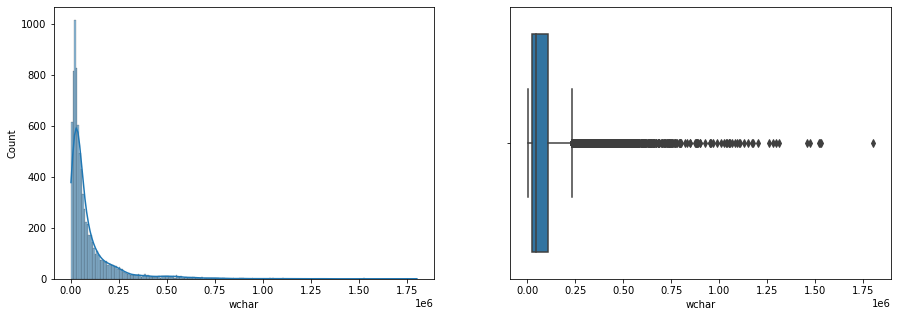

In [31]:
fig,axs = plt.subplots(nrows = 1, ncols= 2, figsize = (15,5))
sns.histplot(df["wchar"],kde=True, ax = axs[0])
sns.boxplot(df["wchar"], ax = axs[1])

In [32]:
df["wchar"].describe()

count    8.177000e+03
mean     9.590299e+04
std      1.408417e+05
min      1.498000e+03
25%      2.291600e+04
50%      4.661900e+04
75%      1.061010e+05
max      1.801623e+06
Name: wchar, dtype: float64

In [33]:
df["wchar"].skew()

3.847654264514702

<AxesSubplot:xlabel='pgout'>

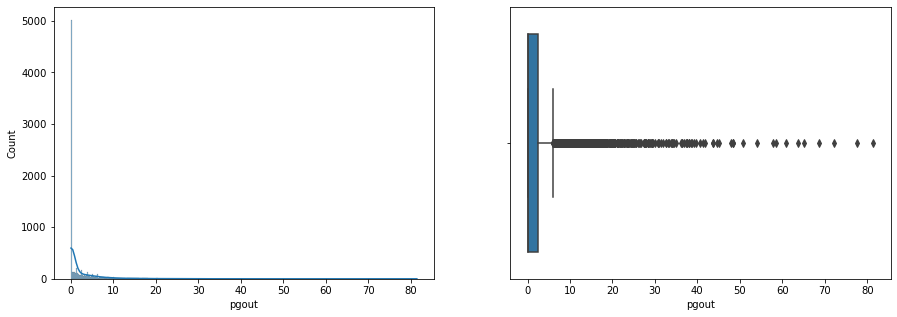

In [34]:
fig,axs = plt.subplots(nrows = 1, ncols= 2, figsize = (15,5))
sns.histplot(df["pgout"],kde=True, ax = axs[0])
sns.boxplot(df["pgout"], ax = axs[1])

In [35]:
df["pgout"].describe()

count    8192.000000
mean        2.285317
std         5.307038
min         0.000000
25%         0.000000
50%         0.000000
75%         2.400000
max        81.440000
Name: pgout, dtype: float64

In [36]:
df["pgout"].skew()

5.0669841185950535

<AxesSubplot:xlabel='ppgout'>

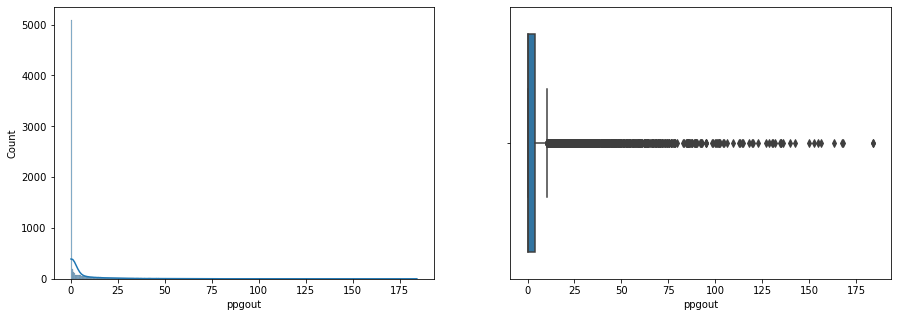

In [37]:
fig,axs = plt.subplots(nrows = 1, ncols= 2, figsize = (15,5))
sns.histplot(df["ppgout"],kde=True, ax = axs[0])
sns.boxplot(df["ppgout"], ax = axs[1])

In [38]:
df["ppgout"].describe()

count    8192.000000
mean        5.977229
std        15.214590
min         0.000000
25%         0.000000
50%         0.000000
75%         4.200000
max       184.200000
Name: ppgout, dtype: float64

In [39]:
df["ppgout"].skew()

4.680441654574661

<AxesSubplot:xlabel='pgfree'>

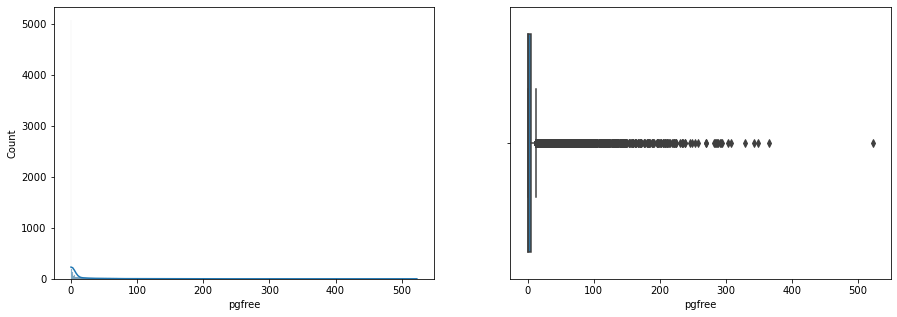

In [40]:
fig,axs = plt.subplots(nrows = 1, ncols= 2, figsize = (15,5))
sns.histplot(df["pgfree"],kde=True, ax = axs[0])
sns.boxplot(df["pgfree"], ax = axs[1])

In [41]:
df["pgfree"].describe()

count    8192.000000
mean       11.919712
std        32.363520
min         0.000000
25%         0.000000
50%         0.000000
75%         5.000000
max       523.000000
Name: pgfree, dtype: float64

In [42]:
df["pgfree"].skew()

4.768191252103855

<AxesSubplot:xlabel='pgscan'>

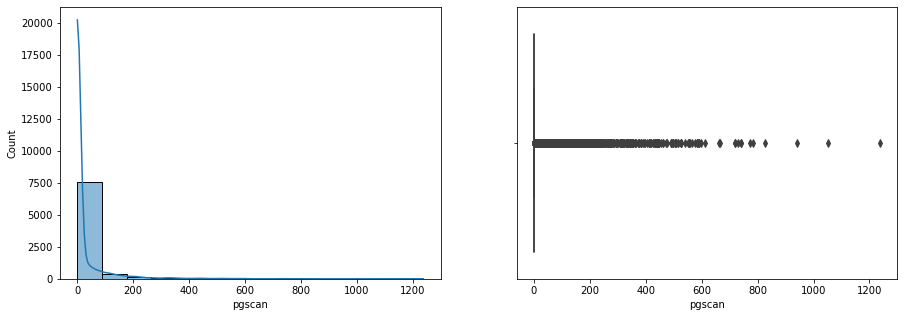

In [43]:
fig,axs = plt.subplots(nrows = 1, ncols= 2, figsize = (15,5))
sns.histplot(df["pgscan"],kde=True, ax = axs[0])
sns.boxplot(df["pgscan"], ax = axs[1])

In [44]:
df["pgscan"].describe()

count    8192.000000
mean       21.526849
std        71.141340
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1237.000000
Name: pgscan, dtype: float64

In [45]:
df["pgscan"].skew()

5.813415144064877

<AxesSubplot:xlabel='atch'>

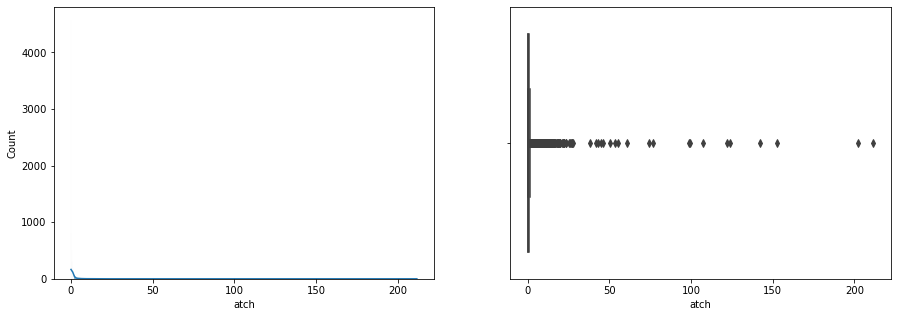

In [46]:
fig,axs = plt.subplots(nrows = 1, ncols= 2, figsize = (15,5))
sns.histplot(df["atch"],kde=True, ax = axs[0])
sns.boxplot(df["atch"], ax = axs[1])

In [47]:
df["atch"].describe()

count    8192.000000
mean        1.127505
std         5.708347
min         0.000000
25%         0.000000
50%         0.000000
75%         0.600000
max       211.580000
Name: atch, dtype: float64

In [48]:
df["atch"].skew()

21.542019683247847

<AxesSubplot:xlabel='pgin'>

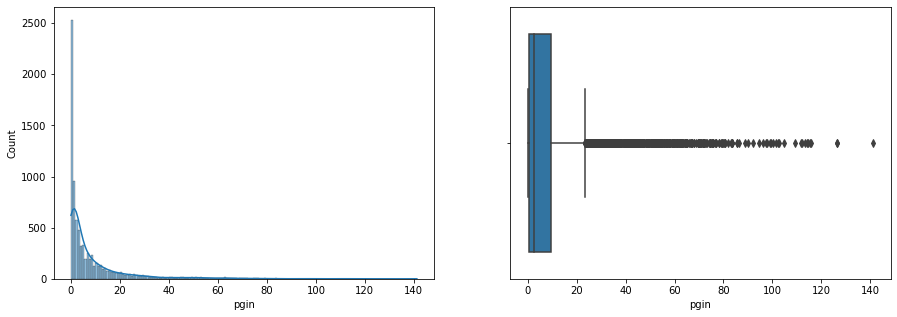

In [49]:
fig,axs = plt.subplots(nrows = 1, ncols= 2, figsize = (15,5))
sns.histplot(df["pgin"],kde=True, ax = axs[0])
sns.boxplot(df["pgin"], ax = axs[1])

In [50]:
df["pgin"].describe()

count    8192.000000
mean        8.277960
std        13.874978
min         0.000000
25%         0.600000
50%         2.800000
75%         9.765000
max       141.200000
Name: pgin, dtype: float64

In [51]:
df["pgin"].skew()

3.2424124762557356

In [52]:
df.columns

Index(['lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar',
       'wchar', 'pgout', 'ppgout', 'pgfree', 'pgscan', 'atch', 'pgin', 'ppgin',
       'pflt', 'vflt', 'runqsz', 'freemem', 'freeswap', 'usr'],
      dtype='object')

<AxesSubplot:xlabel='ppgin'>

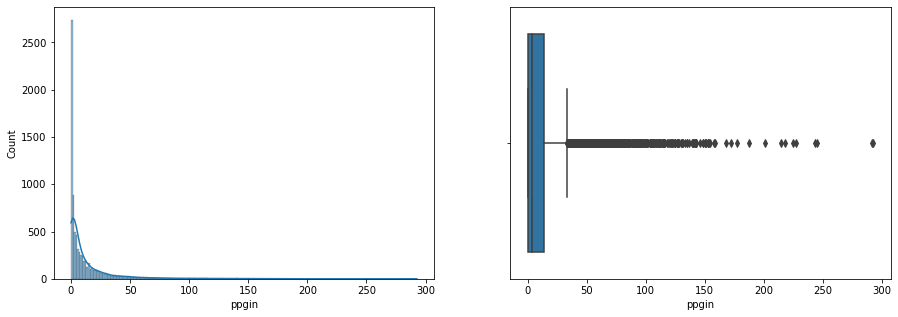

In [53]:
fig,axs = plt.subplots(nrows = 1, ncols= 2, figsize = (15,5))
sns.histplot(df["ppgin"],kde=True, ax = axs[0])
sns.boxplot(df["ppgin"], ax = axs[1])

In [54]:
df["ppgin"].describe()

count    8192.000000
mean       12.388586
std        22.281318
min         0.000000
25%         0.600000
50%         3.800000
75%        13.800000
max       292.610000
Name: ppgin, dtype: float64

In [55]:
df["ppgin"].skew()

3.902764914157577

<AxesSubplot:xlabel='pflt'>

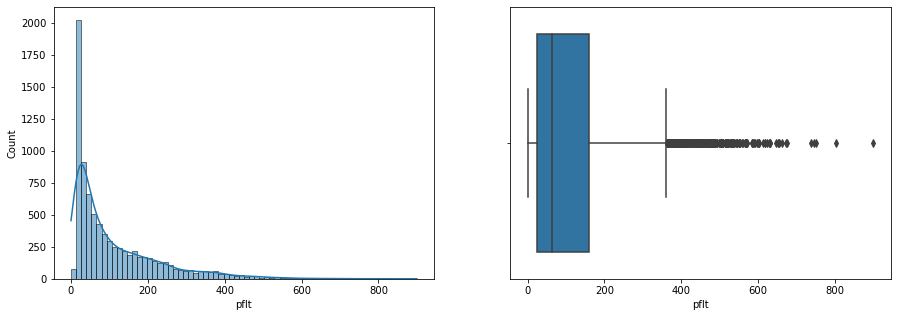

In [56]:
fig,axs = plt.subplots(nrows = 1, ncols= 2, figsize = (15,5))
sns.histplot(df["pflt"],kde=True, ax = axs[0])
sns.boxplot(df["pflt"], ax = axs[1])

In [57]:
df["pflt"].describe()

count    8192.000000
mean      109.793799
std       114.419221
min         0.000000
25%        25.000000
50%        63.800000
75%       159.600000
max       899.800000
Name: pflt, dtype: float64

In [58]:
df["pflt"].skew()

1.7202841192012033

<AxesSubplot:xlabel='vflt'>

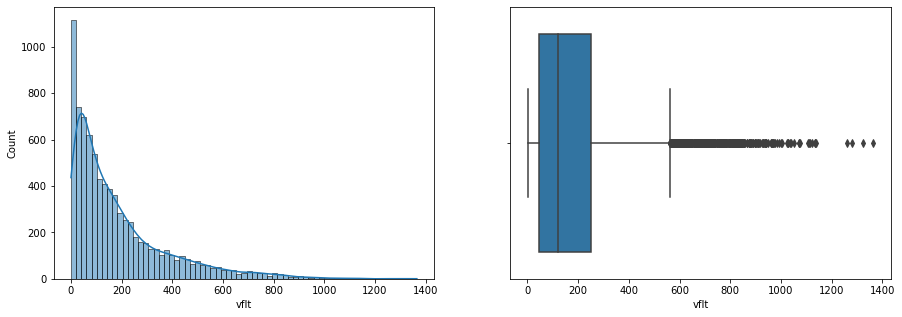

In [59]:
fig,axs = plt.subplots(nrows = 1, ncols= 2, figsize = (15,5))
sns.histplot(df["vflt"],kde=True, ax = axs[0])
sns.boxplot(df["vflt"], ax = axs[1])

In [60]:
df["vflt"].describe()

count    8192.000000
mean      185.315796
std       191.000603
min         0.200000
25%        45.400000
50%       120.400000
75%       251.800000
max      1365.000000
Name: vflt, dtype: float64

In [61]:
df["vflt"].skew()

1.7373265929727528

In [62]:
round(df["runqsz"].value_counts(normalize = True)*100, 3)

Not_CPU_Bound    52.869
CPU_Bound        47.131
Name: runqsz, dtype: float64

<AxesSubplot:xlabel='runqsz', ylabel='count'>

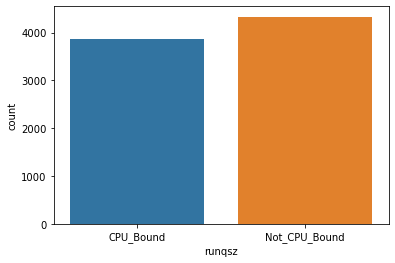

In [63]:
sns.countplot(df["runqsz"])

<AxesSubplot:xlabel='freemem'>

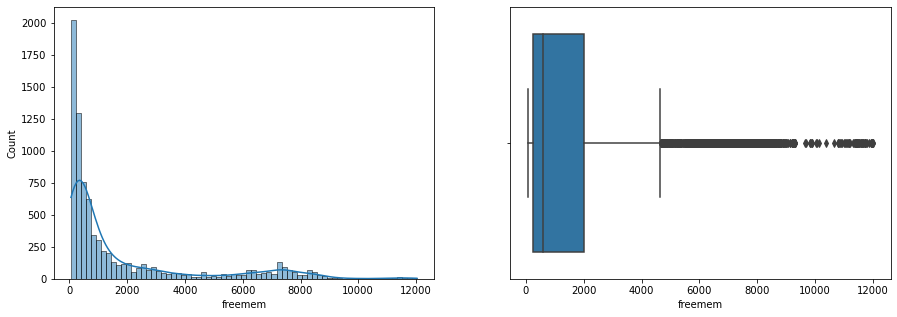

In [64]:
fig,axs = plt.subplots(nrows = 1, ncols= 2, figsize = (15,5))
sns.histplot(df["freemem"],kde=True, ax = axs[0])
sns.boxplot(df["freemem"], ax = axs[1])

In [65]:
df["freemem"].describe()

count     8192.000000
mean      1763.456299
std       2482.104511
min         55.000000
25%        231.000000
50%        579.000000
75%       2002.250000
max      12027.000000
Name: freemem, dtype: float64

In [66]:
df["freemem"].skew()

1.8075546533224125

<AxesSubplot:xlabel='freeswap'>

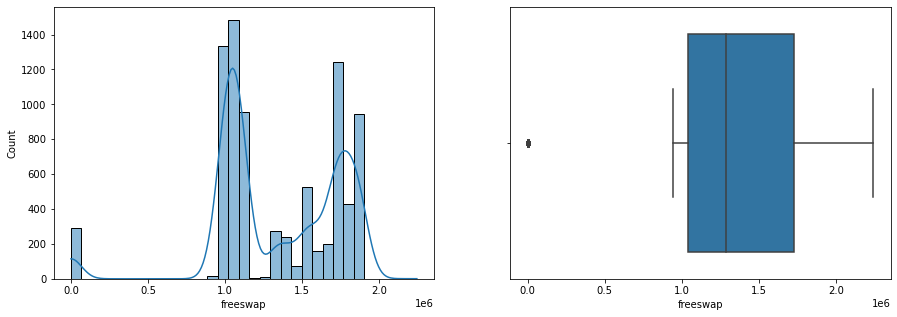

In [67]:
fig,axs = plt.subplots(nrows = 1, ncols= 2, figsize = (15,5))
sns.histplot(df["freeswap"],kde=True, ax = axs[0])
sns.boxplot(df["freeswap"], ax = axs[1])

In [68]:
df["freeswap"].describe()

count    8.192000e+03
mean     1.328126e+06
std      4.220194e+05
min      2.000000e+00
25%      1.042624e+06
50%      1.289290e+06
75%      1.730380e+06
max      2.243187e+06
Name: freeswap, dtype: float64

In [69]:
df["freeswap"].skew()

-0.7916644438525977

<AxesSubplot:xlabel='usr'>

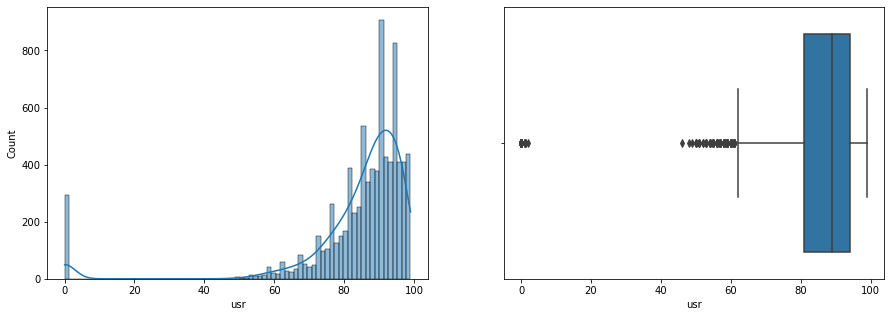

In [70]:
fig,axs = plt.subplots(nrows = 1, ncols= 2, figsize = (15,5))
sns.histplot(df["usr"],kde=True, ax = axs[0])
sns.boxplot(df["usr"], ax = axs[1])

In [71]:
df["usr"].describe()

count    8192.000000
mean       83.968872
std        18.401905
min         0.000000
25%        81.000000
50%        89.000000
75%        94.000000
max        99.000000
Name: usr, dtype: float64

In [72]:
df["usr"].skew()

-3.4167496030437094

In [73]:
#df.columns

In [74]:
### Bivariate Analysis 

<AxesSubplot:xlabel='runqsz', ylabel='usr'>

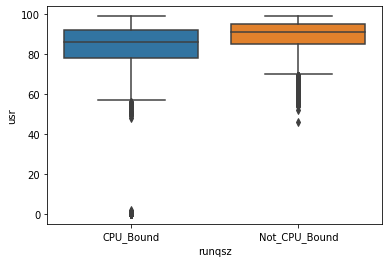

In [75]:
#lets look at the boxplot of  response variable usr with categorical variable runqsz
sns.boxplot(data = df, x="runqsz", y="usr")

In [76]:
#Make pair plot

<AxesSubplot:>

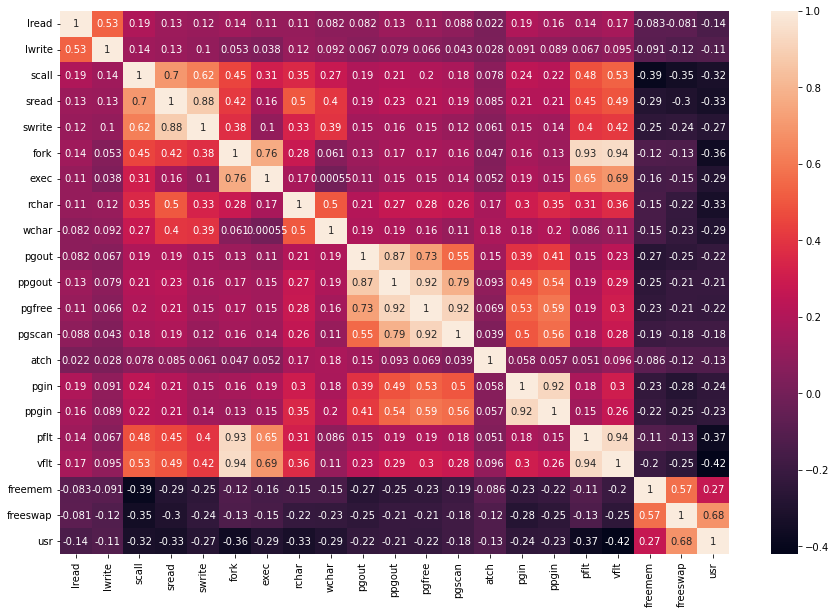

In [77]:
#make heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)

- Correlation more than 75% variables --- vfit and fork, pfit and vfit, pfit and fork, ppgin and pgin, pgscan and pdfree, pgfree and pgout, ppgout and pgout, swrite and sread, pgscan and ppgout , exec and fork, spread and scall
- response variable, usr has the highest positive correlation of 0.68 with freeswap which is moderate. A low positive correlation of 0.27 with freemem and all other variables have weak negative correlation with the usr.

In [78]:
df.columns

Index(['lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar',
       'wchar', 'pgout', 'ppgout', 'pgfree', 'pgscan', 'atch', 'pgin', 'ppgin',
       'pflt', 'vflt', 'runqsz', 'freemem', 'freeswap', 'usr'],
      dtype='object')

In [79]:
df["runqsz"].unique()

array(['CPU_Bound', 'Not_CPU_Bound'], dtype=object)

In [80]:
#Multivariate Analysis

               usr  freeswap
usr       1.000000  0.678526
freeswap  0.678526  1.000000


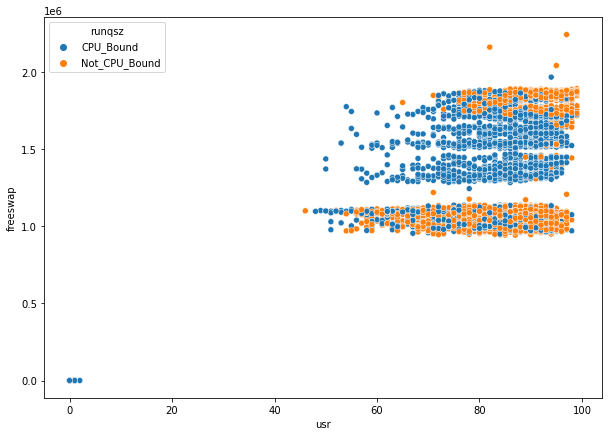

In [81]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=df["usr"], y=df["freeswap"], hue=df["runqsz"])
print(df[["usr","freeswap"]].corr())

              usr   freemem
usr      1.000000  0.270308
freemem  0.270308  1.000000


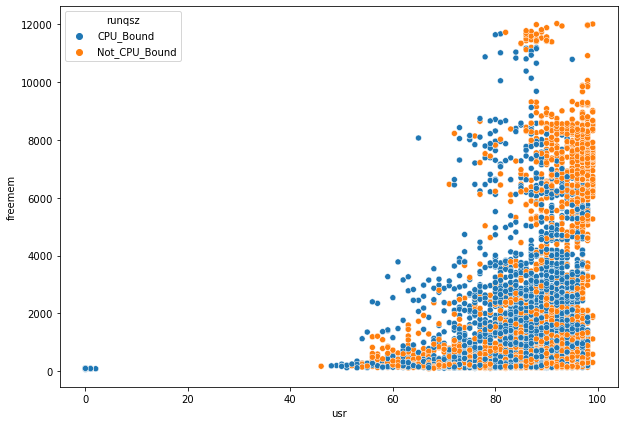

In [82]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=df["usr"], y=df["freemem"], hue=df["runqsz"])
print(df[["usr","freemem"]].corr())

          vflt      fork
vflt  1.000000  0.939348
fork  0.939348  1.000000


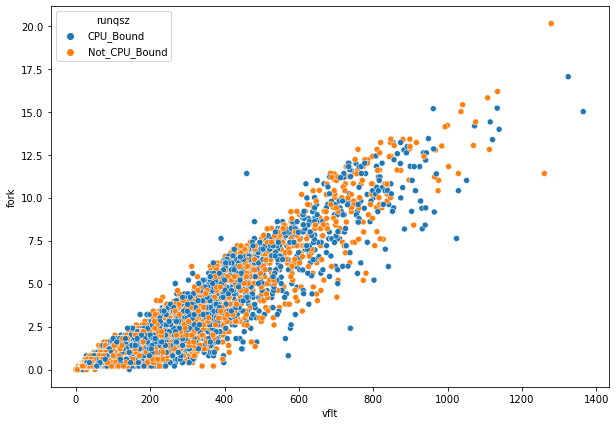

In [83]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=df["vflt"], y=df["fork"], hue=df["runqsz"])
print(df[["vflt","fork"]].corr())

          ppgin      pgin
ppgin  1.000000  0.923621
pgin   0.923621  1.000000


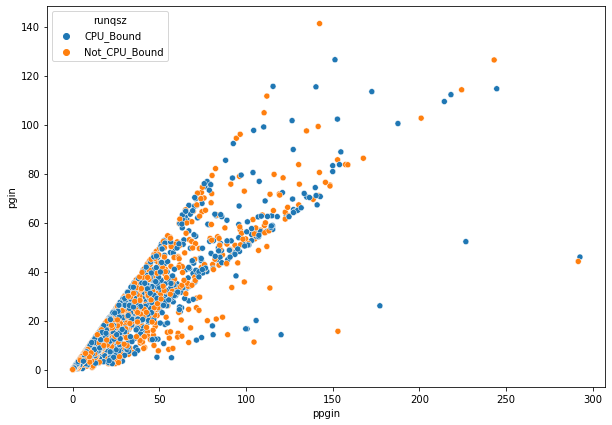

In [84]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=df["ppgin"], y=df["pgin"], hue=df["runqsz"])
print(df[["ppgin","pgin"]].corr())

### 1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Check for the possibility of creating new features if required. Also check for outliers and duplicates if there.

In [85]:
df.isnull().sum()

lread         0
lwrite        0
scall         0
sread         0
swrite        0
fork          0
exec          0
rchar       104
wchar        15
pgout         0
ppgout        0
pgfree        0
pgscan        0
atch          0
pgin          0
ppgin         0
pflt          0
vflt          0
runqsz        0
freemem       0
freeswap      0
usr           0
dtype: int64

In [86]:
#replacing the missing values in rchar with median since there are a lot of outliers
df["rchar"].fillna(df["rchar"].median(), inplace=True)

In [87]:
#replacing the missing values in wchar with median since there are a lot of outliers
df["wchar"].fillna(df["wchar"].median(), inplace=True)

In [88]:
df.isnull().sum()

lread       0
lwrite      0
scall       0
sread       0
swrite      0
fork        0
exec        0
rchar       0
wchar       0
pgout       0
ppgout      0
pgfree      0
pgscan      0
atch        0
pgin        0
ppgin       0
pflt        0
vflt        0
runqsz      0
freemem     0
freeswap    0
usr         0
dtype: int64

In [89]:
#checking for duplicated records.
df.duplicated().sum()

0

In [90]:
#lets look at the percentage of zeros in all the numerical attributes 
for i in df.columns:
    if df[i].dtypes!="object":
        zeros = df[df[i]==0].shape[0]
        print(i, "has {} % of zeros in the records".format(round(zeros/df.shape[0]*100,2)))

lread has 8.24 % of zeros in the records
lwrite has 32.76 % of zeros in the records
scall has 0.0 % of zeros in the records
sread has 0.0 % of zeros in the records
swrite has 0.0 % of zeros in the records
fork has 0.26 % of zeros in the records
exec has 0.26 % of zeros in the records
rchar has 0.0 % of zeros in the records
wchar has 0.0 % of zeros in the records
pgout has 59.55 % of zeros in the records
ppgout has 59.55 % of zeros in the records
pgfree has 59.44 % of zeros in the records
pgscan has 78.71 % of zeros in the records
atch has 55.85 % of zeros in the records
pgin has 14.89 % of zeros in the records
ppgin has 14.89 % of zeros in the records
pflt has 0.04 % of zeros in the records
vflt has 0.0 % of zeros in the records
freemem has 0.0 % of zeros in the records
freeswap has 0.0 % of zeros in the records
usr has 3.45 % of zeros in the records


For going ahead in my analysis, i have dropped all the attributes with more than 30% of zeros and save the new data set as df_new for our further analysis 

In [91]:
df_new = df.drop(["lwrite","pgout", "ppgout", "pgfree", "pgscan", "atch"], axis=1)

In [92]:
df_new.head()

,lread,scall,sread,swrite,fork,exec,rchar,wchar,pgin,ppgin,pflt,vflt,runqsz,freemem,freeswap,usr
0,1,2147,79,68,0.2,0.2,40671.0,53995.0,1.6,2.6,16.00,26.40,CPU_Bound,4670,1730946,95
1,0,170,18,21,0.2,0.2,448.0,8385.0,0.0,0.0,15.63,16.83,Not_CPU_Bound,7278,1869002,97
2,15,2162,159,119,2.0,2.4,125473.5,31950.0,6.0,9.4,150.20,220.20,Not_CPU_Bound,702,1021237,87
3,0,160,12,16,0.2,0.2,125473.5,8670.0,0.2,0.2,15.60,16.80,Not_CPU_Bound,7248,1863704,98
4,5,330,39,38,0.4,0.4,125473.5,12185.0,1.0,1.2,37.80,47.60,Not_CPU_Bound,633,1760253,90


In [93]:
df_new.columns

Index(['lread', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar', 'wchar',
       'pgin', 'ppgin', 'pflt', 'vflt', 'runqsz', 'freemem', 'freeswap',
       'usr'],
      dtype='object')

<AxesSubplot:>

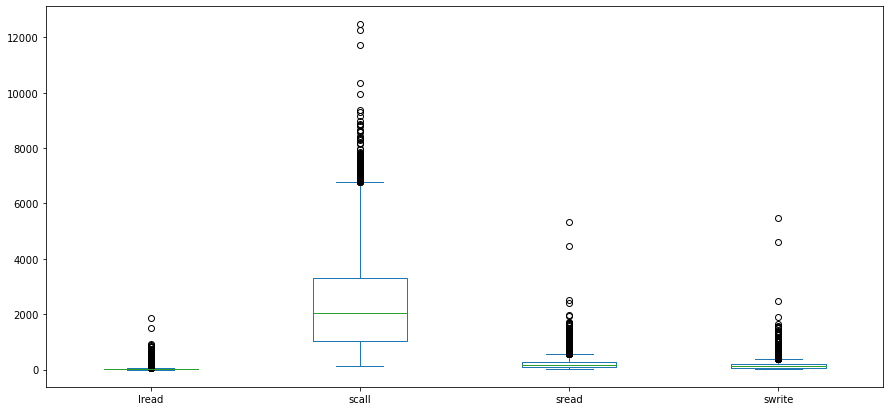

In [94]:
df_new[['lread', 'scall', 'sread', 'swrite']].plot(kind="box", figsize=(15,7))

<AxesSubplot:>

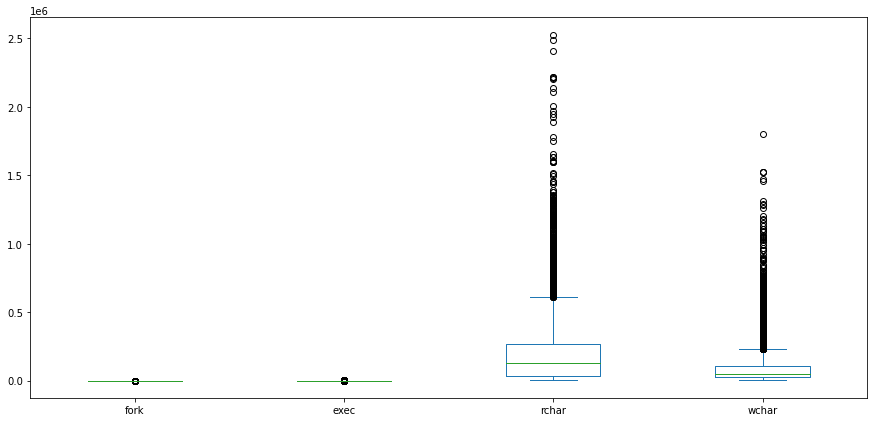

In [95]:
df_new[['fork', 'exec', 'rchar', 'wchar']].plot(kind="box", figsize=(15,7))

<AxesSubplot:>

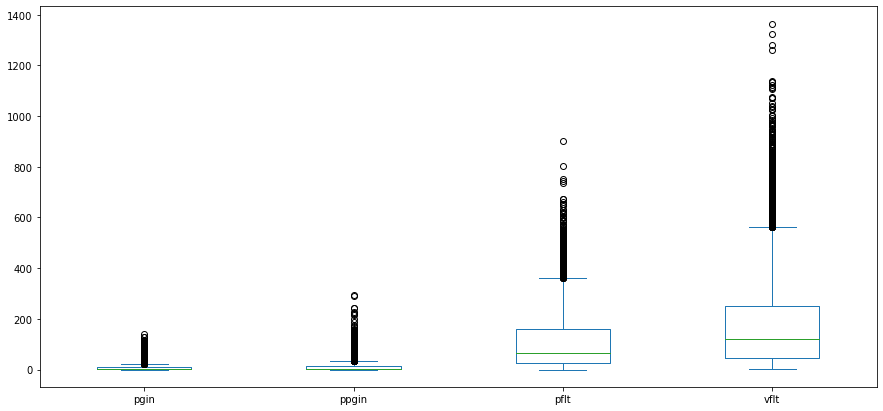

In [96]:
df_new[['pgin', 'ppgin', 'pflt', 'vflt']].plot(kind="box", figsize=(15,7))

<AxesSubplot:>

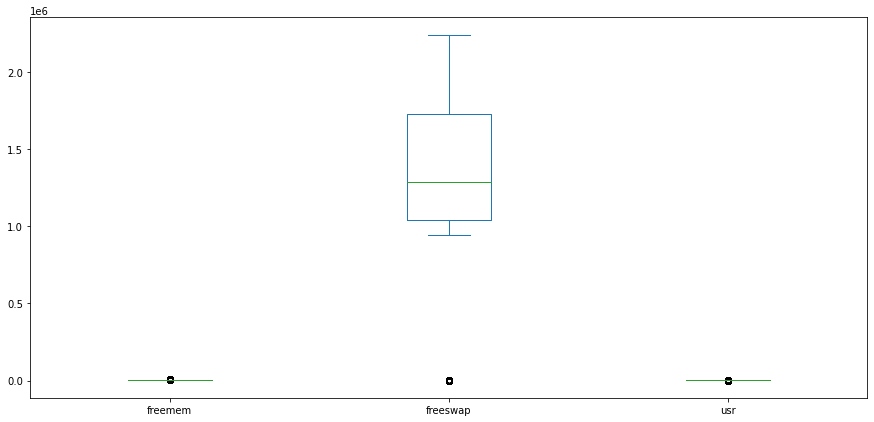

In [97]:
df_new[['freemem', 'freeswap',
       'usr']].plot(kind="box", figsize=(15,7))

In [98]:
#Outlier treatment
for i in df_new.columns:
    if df_new[i].dtype != "object":
        q1,q3 = df_new[i].quantile(0.25), df_new[i].quantile(0.75)
        IQR = q3-q1
        ul = q3+1.5*IQR
        ll = q1-1.5*IQR
        df_new[i]=np.where(df_new[i]>ul, ul, df_new[i])
        df_new[i]=np.where(df_new[i]<ll, ll, df_new[i])

<AxesSubplot:>

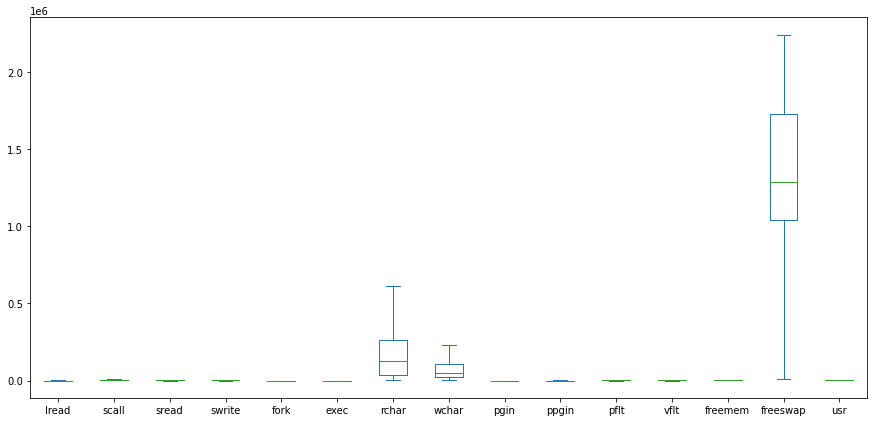

In [99]:
#checking the boxplots after outlier treatement 
df_new.plot(kind="box", figsize=(15,7))

### 1.3 Encode the data (having string values) for Modelling. Split the data into train and test (70:30). Apply Linear regression using scikit learn. Perform checks for significant variables using appropriate method from statsmodel. Create multiple models and check the performance of Predictions on Train and Test sets using Rsquare, RMSE & Adj Rsquare. Compare these models and select the best one with appropriate reasoning.

In [100]:
df_new = pd.get_dummies(df_new, columns=["runqsz"], drop_first=True)
df_new.head()

,lread,scall,sread,swrite,fork,exec,rchar,wchar,pgin,ppgin,pflt,vflt,freemem,freeswap,usr,runqsz_Not_CPU_Bound
0,1.0,2147.0,79.0,68.0,0.2,0.2,40671.0,53995.0,1.6,2.6,16.00,26.40,4659.125,1730946.0,95.0,0
1,0.0,170.0,18.0,21.0,0.2,0.2,448.0,8385.0,0.0,0.0,15.63,16.83,4659.125,1869002.0,97.0,1
2,15.0,2162.0,159.0,119.0,2.0,2.4,125473.5,31950.0,6.0,9.4,150.20,220.20,702.000,1021237.0,87.0,1
3,0.0,160.0,12.0,16.0,0.2,0.2,125473.5,8670.0,0.2,0.2,15.60,16.80,4659.125,1863704.0,98.0,1
4,5.0,330.0,39.0,38.0,0.4,0.4,125473.5,12185.0,1.0,1.2,37.80,47.60,633.000,1760253.0,90.0,1


In [101]:
df_new["runqsz_Not_CPU_Bound"].value_counts()

1    4331
0    3861
Name: runqsz_Not_CPU_Bound, dtype: int64

In [102]:
#Split the data into train and test (70:30).

# Copy all the predictor variables into X dataframe
df_x = df_new.drop('usr', axis=1)

# Copy target into the y dataframe. 
df_y = df[['usr']]

In [103]:
from sklearn.model_selection import train_test_split
df_x_train, df_x_test, df_y_train, df_y_test = train_test_split(df_x,df_y,test_size=0.30, random_state=123)

In [104]:
df_x_train.shape

(5734, 15)

In [105]:
df_x_train.head()

,lread,scall,sread,swrite,fork,exec,rchar,wchar,pgin,ppgin,pflt,vflt,freemem,freeswap,runqsz_Not_CPU_Bound
6781,1.0,2078.0,94.0,97.0,0.4,0.4,30254.0,10055.0,1.0000,1.40,23.8,40.0,313.000,1716179.0,0
6762,47.0,4432.0,568.5,222.0,4.9,6.7,386448.0,38136.0,23.5125,29.74,361.5,561.4,132.000,972691.0,0
1308,7.0,2304.0,99.0,69.0,0.6,0.6,146483.0,27071.0,1.0000,1.60,57.6,52.2,4659.125,1721694.0,0
4086,25.0,1039.0,112.0,45.0,0.8,1.2,243641.0,36586.0,1.8000,3.20,66.8,108.4,581.000,1749042.0,1
1621,2.0,386.0,42.0,14.0,2.2,2.2,92461.0,20544.0,2.2000,4.00,208.8,178.0,4659.125,1879085.0,1


In [106]:
df_x_test.shape

(2458, 15)

In [107]:
df_x_test.head()

,lread,scall,sread,swrite,fork,exec,rchar,wchar,pgin,ppgin,pflt,vflt,freemem,freeswap,runqsz_Not_CPU_Bound
5455,2.0,817.0,43.0,73.0,0.4,0.8,102203.000,26343.000,2.0000,2.2,34.40,47.60,494.0,1014829.0,1
152,5.0,3694.0,568.5,368.0,2.4,2.2,611196.125,230625.875,23.5125,33.6,111.82,234.87,502.0,1132314.0,1
6394,0.0,820.0,157.0,68.0,0.4,0.4,212904.000,156341.000,2.4000,4.0,33.80,39.80,1063.0,1753798.0,0
7509,2.0,2560.0,286.0,237.0,0.8,3.6,218944.000,230625.875,23.5125,33.6,39.60,54.60,3274.0,1737648.0,0
6343,12.0,1207.0,280.0,200.0,0.2,0.2,13777.000,74406.000,2.0000,2.0,15.20,28.20,236.0,1708720.0,0


In [108]:
df_y_train.shape

(5734, 1)

In [109]:
df_y_train.head()

,usr
6781,95
6762,58
1308,92
4086,87
1621,88


In [110]:
df_y_test.shape

(2458, 1)

In [111]:
df_y_test.head()

,usr
5455,96
152,76
6394,95
7509,83
6343,92


### Linear Regression Model using sklearn

#### 1st Model, data without scaling

In [112]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [113]:
LRM = LinearRegression()
LRM.fit(df_x_train,df_y_train)

LinearRegression()

In [114]:
# R square on training data
LRM.score(df_x_train, df_y_train)

0.6244468620819907

In [115]:
# R square on testing data
LRM.score(df_x_test, df_y_test)

0.584708445622597

In [116]:
#RMSE on Training data
df_predicted_train=LRM.fit(df_x_train, df_y_train).predict(df_x_train)
np.sqrt(metrics.mean_squared_error(df_y_train,df_predicted_train))

11.606019150046972

In [117]:
#RMSE on Testing data
df_predicted_test=LRM.fit(df_x_train, df_y_train).predict(df_x_test)
np.sqrt(metrics.mean_squared_error(df_y_test,df_predicted_test))

10.99953725746268

### Linear Regression using statsmodels(OLS)

In [118]:
import statsmodels.api as sm

In [119]:
olsmod_train = sm.OLS(df_y_train, df_x_train)
olsres_train = olsmod_train.fit()

In [120]:
print(olsres_train.summary())

                                 OLS Regression Results                                
Dep. Variable:                    usr   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.973
Method:                 Least Squares   F-statistic:                          1.358e+04
Date:                Wed, 11 Jan 2023   Prob (F-statistic):                        0.00
Time:                        15:52:46   Log-Likelihood:                         -23345.
No. Observations:                5734   AIC:                                  4.672e+04
Df Residuals:                    5719   BIC:                                  4.682e+04
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [121]:
#calculating the MSE and RMSE on train data 
predicted_train_ols=olsres_train.predict(df_x_train)
mse_train=metrics.mean_squared_error(df_y_train, predicted_train_ols)
RMSE_train_ols = np.sqrt(mse_train)
print("RMSE for training data without scaling is ", RMSE_train_ols)

RMSE for training data without scaling is  14.187055268200607


In [122]:
#ols model for testing data
olsmod_test = sm.OLS(df_y_test, df_x_test)
olsres_test = olsmod_test.fit()

In [123]:
print(olsres_test.summary())

                                 OLS Regression Results                                
Dep. Variable:                    usr   R-squared (uncentered):                   0.974
Model:                            OLS   Adj. R-squared (uncentered):              0.973
Method:                 Least Squares   F-statistic:                              5998.
Date:                Wed, 11 Jan 2023   Prob (F-statistic):                        0.00
Time:                        15:52:46   Log-Likelihood:                         -9977.4
No. Observations:                2458   AIC:                                  1.998e+04
Df Residuals:                    2443   BIC:                                  2.007e+04
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [124]:
#calculating the MSE and RMSE on test data
predicted_test_ols=olsres_test.predict(df_x_test)
mse_test=metrics.mean_squared_error(df_y_test, predicted_test_ols)
RMSE_test_ols = np.sqrt(mse_test)
print("RMSE for testing data without scaling is ",RMSE_test_ols)

RMSE for testing data without scaling is  14.016169508242122


========================================================================================================================

#### Model 2 after scaling the data

In [125]:
df_x_train.head()

,lread,scall,sread,swrite,fork,exec,rchar,wchar,pgin,ppgin,pflt,vflt,freemem,freeswap,runqsz_Not_CPU_Bound
6781,1.0,2078.0,94.0,97.0,0.4,0.4,30254.0,10055.0,1.0000,1.40,23.8,40.0,313.000,1716179.0,0
6762,47.0,4432.0,568.5,222.0,4.9,6.7,386448.0,38136.0,23.5125,29.74,361.5,561.4,132.000,972691.0,0
1308,7.0,2304.0,99.0,69.0,0.6,0.6,146483.0,27071.0,1.0000,1.60,57.6,52.2,4659.125,1721694.0,0
4086,25.0,1039.0,112.0,45.0,0.8,1.2,243641.0,36586.0,1.8000,3.20,66.8,108.4,581.000,1749042.0,1
1621,2.0,386.0,42.0,14.0,2.2,2.2,92461.0,20544.0,2.2000,4.00,208.8,178.0,4659.125,1879085.0,1


In [126]:
from scipy.stats import zscore 

df_x_train_scaled = df_x_train.apply(zscore)
df_x_test_scaled = df_x_test.apply(zscore)
df_y_train_scaled = df_y_train.apply(zscore)
df_y_test_scaled = df_y_test.apply(zscore)

In [127]:
df_x_train_scaled.head()

,lread,scall,sread,swrite,fork,exec,rchar,wchar,pgin,ppgin,pflt,vflt,freemem,freeswap,runqsz_Not_CPU_Bound
6781,-0.816446,-0.140904,-0.727073,-0.428929,-0.723457,-0.754036,-0.856682,-0.932454,-0.702877,-0.695233,-0.803001,-0.830748,-0.667033,0.919550,-1.055977
6762,2.219078,1.338193,2.520183,0.857028,2.121710,2.342398,1.178306,-0.537407,2.219857,1.845524,2.528970,2.399695,-0.779953,-0.827056,-1.055977
1308,-0.420509,0.001100,-0.692855,-0.716984,-0.597005,-0.655737,-0.192649,-0.693071,-0.702877,-0.677303,-0.469508,-0.755161,2.044358,0.932506,-1.055977
4086,0.767305,-0.793742,-0.603889,-0.963888,-0.470554,-0.360838,0.362429,-0.559213,-0.599015,-0.533858,-0.378735,-0.406962,-0.499838,0.996752,0.946991
1621,-0.750457,-1.204044,-1.082936,-1.282805,0.414610,0.130659,-0.501284,-0.784893,-0.547084,-0.462136,1.022331,0.024260,2.044358,1.302250,0.946991


In [128]:
df_y_train_scaled.head()

,usr
6781,0.594536
6762,-1.359147
1308,0.436130
4086,0.172118
1621,0.224921


In [129]:
#Fitting the data in the model using Linear Regression model
LRM.fit(df_x_train_scaled,df_y_train_scaled)

LinearRegression()

In [130]:
#R squre for scaled training data
print("R sq for scaled training data is ", LRM.score(df_x_train_scaled,df_y_train_scaled))
print("R sq for scaled testing data is ", LRM.score(df_x_test_scaled,df_y_test_scaled))

R sq for scaled training data is  0.6244468620819906
R sq for scaled testing data is  0.5891224663925376


In [131]:
#RMSE on Training data after scaling using LRM
df_predicted_train_scaled=LRM.fit(df_x_train_scaled, df_y_train_scaled).predict(df_x_train_scaled)
print("RMSE for scaled training data using LRM is ",np.sqrt(metrics.mean_squared_error(df_y_train_scaled,df_predicted_train_scaled)))

#RMSE on testing data after scaling using LRM
df_predicted_test_scaled=LRM.fit(df_x_test_scaled, df_y_test_scaled).predict(df_x_test_scaled)
print("RMSE for scaled testing data using LRM is ",np.sqrt(metrics.mean_squared_error(df_y_test_scaled,df_predicted_test_scaled)))

RMSE for scaled training data using LRM is  0.6128239044929704
RMSE for scaled testing data using LRM is  0.6360576939212406


In [132]:
# Regression using ols model for training data after scaling
olsmod_scaled_train = sm.OLS(df_y_train_scaled, df_x_train_scaled)
olsres_scaled_train = olsmod_scaled_train.fit()

In [133]:
print(olsres_scaled_train.summary())

                                 OLS Regression Results                                
Dep. Variable:                    usr   R-squared (uncentered):                   0.624
Model:                            OLS   Adj. R-squared (uncentered):              0.623
Method:                 Least Squares   F-statistic:                              633.9
Date:                Wed, 11 Jan 2023   Prob (F-statistic):                        0.00
Time:                        15:52:47   Log-Likelihood:                         -5328.4
No. Observations:                5734   AIC:                                  1.069e+04
Df Residuals:                    5719   BIC:                                  1.079e+04
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [134]:
# Regression using ols model for test data
olsmod_scaled_test = sm.OLS(df_y_test_scaled, df_x_test_scaled)
olsres_scaled_test = olsmod_scaled_test.fit()
print(olsres_scaled_test.summary())

                                 OLS Regression Results                                
Dep. Variable:                    usr   R-squared (uncentered):                   0.595
Model:                            OLS   Adj. R-squared (uncentered):              0.593
Method:                 Least Squares   F-statistic:                              239.7
Date:                Wed, 11 Jan 2023   Prob (F-statistic):                        0.00
Time:                        15:52:47   Log-Likelihood:                         -2375.6
No. Observations:                2458   AIC:                                      4781.
Df Residuals:                    2443   BIC:                                      4868.
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

======================================================================================================================

======================================================================================================================

### Problem 2: Logistic Regression, LDA and CART

You are a statistician at the Republic of Indonesia Ministry of Health and you are provided with a data of 1473 females collected from a Contraceptive Prevalence Survey. The samples are married women who were either not pregnant or do not know if they were at the time of the survey.

The problem is to predict do/don't they use a contraceptive method of choice based on their demographic and socio-economic characteristics.

In [135]:
data = pd.read_excel("Contraceptive_method_dataset.xlsx")

### 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, check for duplicates and outliers and write an inference on it. Perform Univariate and Bivariate Analysis and Multivariate Analysis.

In [136]:
data.shape

(1473, 10)

In [137]:
data.head().T

,0,1,2,3,4
Wife_age,24.0,45.0,43.0,42.0,36.0
Wife_ education,Primary,Uneducated,Primary,Secondary,Secondary
Husband_education,Secondary,Secondary,Secondary,Primary,Secondary
No_of_children_born,3.0,10.0,7.0,9.0,8.0
Wife_religion,Scientology,Scientology,Scientology,Scientology,Scientology
Wife_Working,No,No,No,No,No
Husband_Occupation,2,3,3,3,3
Standard_of_living_index,High,Very High,Very High,High,Low
Media_exposure,Exposed,Exposed,Exposed,Exposed,Exposed
Contraceptive_method_used,No,No,No,No,No


In [138]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1402 non-null   float64
 1   Wife_ education            1473 non-null   object 
 2   Husband_education          1473 non-null   object 
 3   No_of_children_born        1452 non-null   float64
 4   Wife_religion              1473 non-null   object 
 5   Wife_Working               1473 non-null   object 
 6   Husband_Occupation         1473 non-null   int64  
 7   Standard_of_living_index   1473 non-null   object 
 8   Media_exposure             1473 non-null   object 
 9   Contraceptive_method_used  1473 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 115.2+ KB


In [139]:
data.columns

Index(['Wife_age', 'Wife_ education', 'Husband_education',
       'No_of_children_born', 'Wife_religion', 'Wife_Working',
       'Husband_Occupation', 'Standard_of_living_index', 'Media_exposure ',
       'Contraceptive_method_used'],
      dtype='object')

In [140]:
#Renaming Wife_ education to Wife_education
data.rename(columns={"Wife_ education": "Wife_education"}, inplace = True)
data.rename(columns={"Media_exposure ": "Media_exposure"}, inplace = True)

In [141]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Wife_age,1402.0,NaN,NaN,NaN,32.606277,8.274927,16.0,26.0,32.0,39.0,49.0
Wife_education,1473,4,Tertiary,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Husband_education,1473,4,Tertiary,899,NaN,NaN,NaN,NaN,NaN,NaN,NaN
No_of_children_born,1452.0,NaN,NaN,NaN,3.254132,2.365212,0.0,1.0,3.0,4.0,16.0
Wife_religion,1473,2,Scientology,1253,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Wife_Working,1473,2,No,1104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Husband_Occupation,1473.0,NaN,NaN,NaN,2.137814,0.864857,1.0,1.0,2.0,3.0,4.0
Standard_of_living_index,1473,4,Very High,684,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Media_exposure,1473,2,Exposed,1364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Contraceptive_method_used,1473,2,Yes,844,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [142]:
#Husband_Occupation should better be considered as categorical variables
data["Husband_Occupation"]=data["Husband_Occupation"].astype("object")

In [143]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1402 non-null   float64
 1   Wife_education             1473 non-null   object 
 2   Husband_education          1473 non-null   object 
 3   No_of_children_born        1452 non-null   float64
 4   Wife_religion              1473 non-null   object 
 5   Wife_Working               1473 non-null   object 
 6   Husband_Occupation         1473 non-null   object 
 7   Standard_of_living_index   1473 non-null   object 
 8   Media_exposure             1473 non-null   object 
 9   Contraceptive_method_used  1473 non-null   object 
dtypes: float64(2), object(8)
memory usage: 115.2+ KB


In [144]:
#Checking for null values 
data.isnull().sum()

Wife_age                     71
Wife_education                0
Husband_education             0
No_of_children_born          21
Wife_religion                 0
Wife_Working                  0
Husband_Occupation            0
Standard_of_living_index      0
Media_exposure                0
Contraceptive_method_used     0
dtype: int64

count    1402.000000
mean       32.606277
std         8.274927
min        16.000000
25%        26.000000
50%        32.000000
75%        39.000000
max        49.000000
Name: Wife_age, dtype: float64


<AxesSubplot:xlabel='Wife_age'>

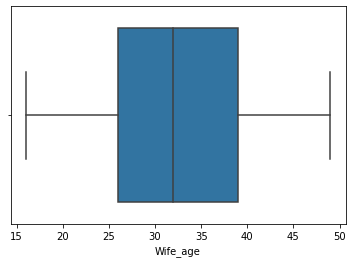

In [145]:
#Imputation on null values in Wife's Age

print(data.Wife_age.describe())
sns.boxplot(data["Wife_age"])

In [146]:
data["Wife_age"].fillna(data["Wife_age"].mean(), inplace = True)

In [147]:
#Imputation on null values in Number of childen born
data["No_of_children_born"].mode()

0    2.0
Name: No_of_children_born, dtype: float64

In [148]:
data["No_of_children_born"]=data["No_of_children_born"].fillna(2.0)

In [149]:
data.isnull().sum()

Wife_age                     0
Wife_education               0
Husband_education            0
No_of_children_born          0
Wife_religion                0
Wife_Working                 0
Husband_Occupation           0
Standard_of_living_index     0
Media_exposure               0
Contraceptive_method_used    0
dtype: int64

In [150]:
print("total number of duplicates are ",data.duplicated().sum())
print("percentage of duplicates in the data ", data.duplicated().sum()/data.shape[0]*100)

total number of duplicates are  81
percentage of duplicates in the data  5.4989816700611


In [151]:
data[data.duplicated()]

,Wife_age,Wife_education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
79,38.000000,Tertiary,Tertiary,1.0,Scientology,Yes,1,Very High,Exposed,No
167,26.000000,Tertiary,Tertiary,1.0,Scientology,No,1,Very High,Exposed,No
224,47.000000,Tertiary,Tertiary,4.0,Scientology,No,1,Very High,Exposed,No
270,30.000000,Tertiary,Tertiary,2.0,Scientology,No,1,Very High,Exposed,No
299,26.000000,Tertiary,Tertiary,1.0,Scientology,No,1,Very High,Exposed,No
...,...,...,...,...,...,...,...,...,...,...
1387,32.606277,Secondary,Tertiary,2.0,Scientology,Yes,2,Very High,Exposed,Yes
1423,32.606277,Tertiary,Tertiary,2.0,Non-Scientology,No,1,Very High,Exposed,Yes
1440,32.606277,Tertiary,Tertiary,1.0,Non-Scientology,Yes,2,Very High,Exposed,Yes
1447,32.606277,Tertiary,Tertiary,2.0,Non-Scientology,Yes,2,Very High,Exposed,Yes


In [152]:
#In this data set, there is no unique identifier so it will not be suitable to drop the duplicates because there is a possibility of the columns to be same in case of these attributes

<AxesSubplot:>

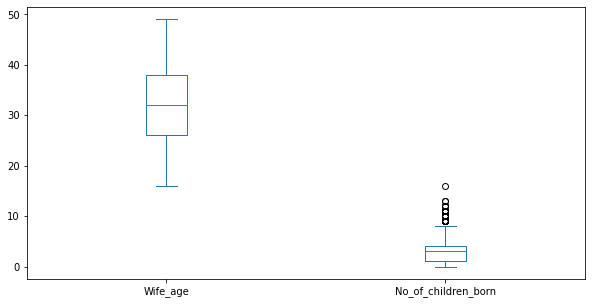

In [153]:
data.plot(kind="box", figsize=(10,5))  #Checking the outliers

### Univariate Analysis

In [154]:
# Wife age
data["Wife_age"].describe()

count    1473.000000
mean       32.606277
std         8.072896
min        16.000000
25%        26.000000
50%        32.000000
75%        38.000000
max        49.000000
Name: Wife_age, dtype: float64

<AxesSubplot:xlabel='Wife_age'>

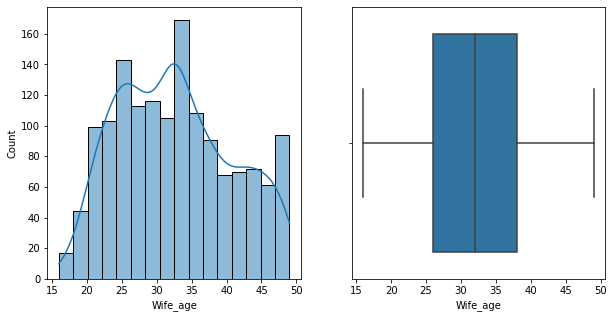

In [155]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize=(10,5))
sns.histplot(data["Wife_age"],kde = True, ax =axs[0])
sns.boxplot(data["Wife_age"], ax = axs[1])

In [156]:
#No_of_children_born
data["No_of_children_born"].describe()

count    1473.000000
mean        3.236253
std         2.352985
min         0.000000
25%         1.000000
50%         3.000000
75%         4.000000
max        16.000000
Name: No_of_children_born, dtype: float64

<AxesSubplot:xlabel='No_of_children_born'>

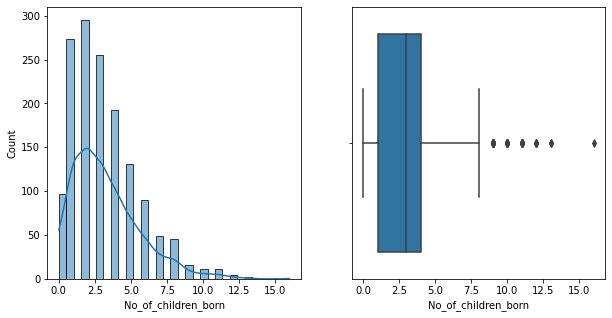

In [157]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize=(10,5))
sns.histplot(data["No_of_children_born"],kde = True, ax =axs[0])
sns.boxplot(data["No_of_children_born"], ax = axs[1])

In [158]:
#data.columns

Tertiary      0.391718
Secondary     0.278344
Primary       0.226748
Uneducated    0.103191
Name: Wife_education, dtype: float64


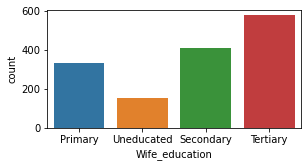

Tertiary      0.610319
Secondary     0.238968
Primary       0.120842
Uneducated    0.029871
Name: Husband_education, dtype: float64


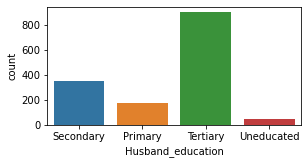

Scientology        0.850645
Non-Scientology    0.149355
Name: Wife_religion, dtype: float64


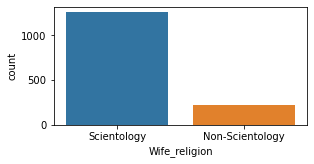

No     0.749491
Yes    0.250509
Name: Wife_Working, dtype: float64


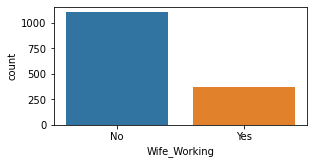

3    0.397149
1    0.295995
2    0.288527
4    0.018330
Name: Husband_Occupation, dtype: float64


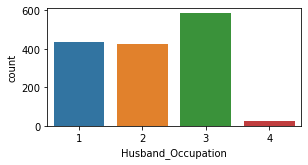

Very High    0.464358
High         0.292600
Low          0.155465
Very Low     0.087576
Name: Standard_of_living_index, dtype: float64


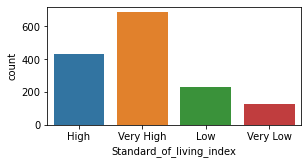

Exposed        0.926001
Not-Exposed    0.073999
Name: Media_exposure, dtype: float64


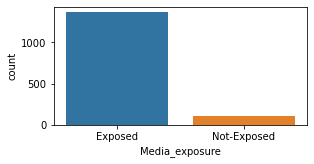

Yes    0.57298
No     0.42702
Name: Contraceptive_method_used, dtype: float64


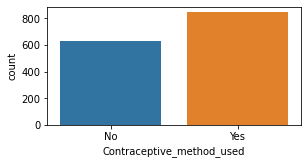

In [159]:
j = 1
for i in data[['Wife_education', 'Husband_education', 'Wife_religion', 'Wife_Working',
       'Husband_Occupation', 'Standard_of_living_index', 'Media_exposure',
       'Contraceptive_method_used']]:
    print(data[i].value_counts(normalize = True))
    plt.figure(figsize =(10,10))
    plt.subplot(4,2,j)
    sns.countplot(data[i])
    j=j+1
    plt.show()

### Bivariate Analysis 

<AxesSubplot:xlabel='Wife_age', ylabel='No_of_children_born'>

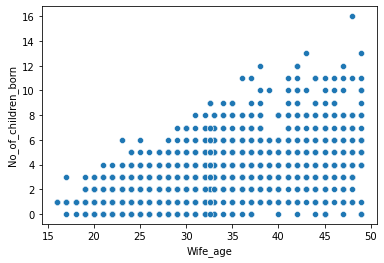

In [160]:
#Wife_age vs number of children born
sns.scatterplot( x=data["Wife_age"], y=data["No_of_children_born"])

In [161]:
data.columns

Index(['Wife_age', 'Wife_education', 'Husband_education',
       'No_of_children_born', 'Wife_religion', 'Wife_Working',
       'Husband_Occupation', 'Standard_of_living_index', 'Media_exposure',
       'Contraceptive_method_used'],
      dtype='object')

<AxesSubplot:xlabel='Contraceptive_method_used', ylabel='Wife_age'>

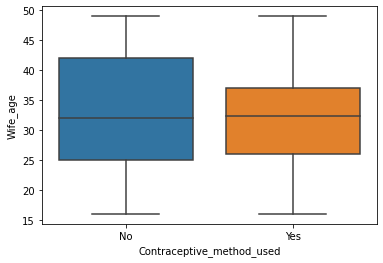

In [162]:
sns.boxplot(y=data["Wife_age"], x=data["Contraceptive_method_used"])

<AxesSubplot:xlabel='Contraceptive_method_used', ylabel='No_of_children_born'>

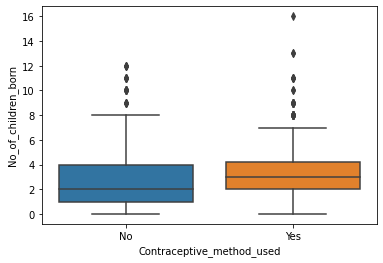

In [163]:
sns.boxplot(y=data["No_of_children_born"], x=data["Contraceptive_method_used"])

<AxesSubplot:xlabel='Wife_education', ylabel='count'>

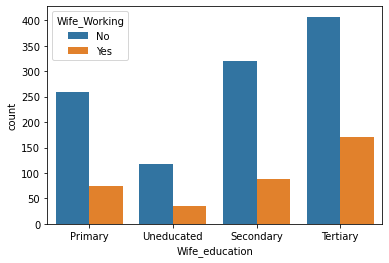

In [164]:
sns.countplot(data["Wife_education"], hue=data["Wife_Working"])

<AxesSubplot:xlabel='Wife_Working', ylabel='Wife_age'>

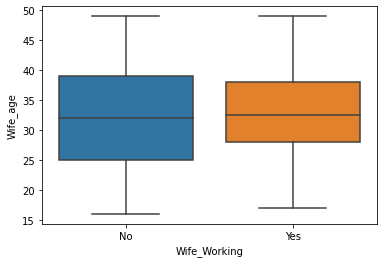

In [165]:
sns.boxplot(y=data["Wife_age"], x=data["Wife_Working"])


<AxesSubplot:>

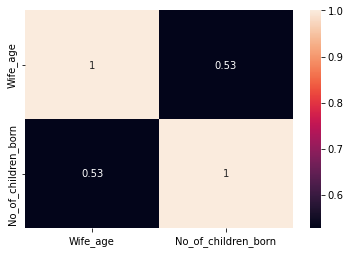

In [166]:
sns.heatmap(data.corr(), annot=True)

#### Multivariate Analysis

<AxesSubplot:xlabel='Contraceptive_method_used', ylabel='Wife_age'>

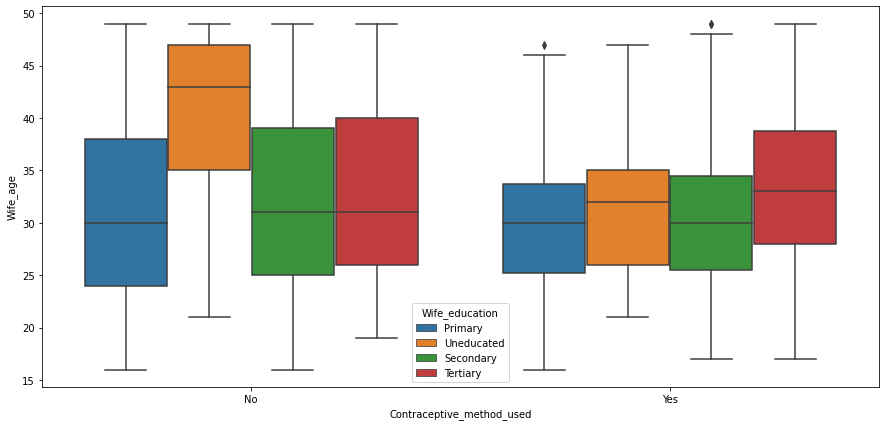

In [167]:
plt.figure(figsize=(15,7))
sns.boxplot(y=data["Wife_age"], x=data["Contraceptive_method_used"], hue=data["Wife_education"])

<AxesSubplot:xlabel='Contraceptive_method_used', ylabel='Wife_age'>

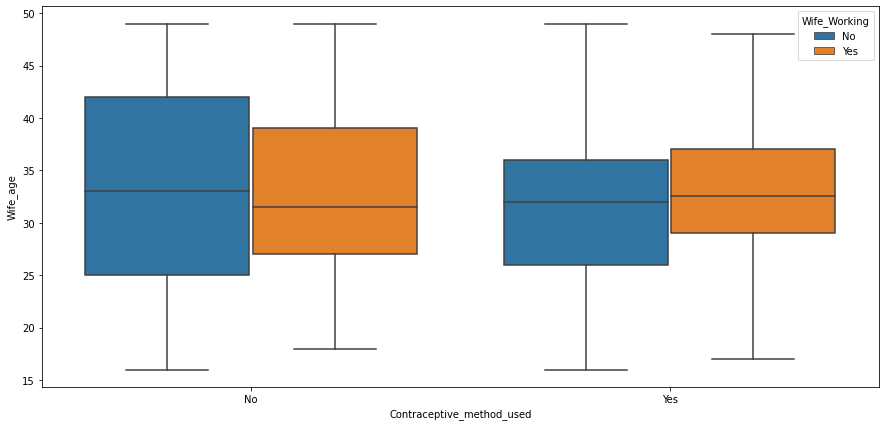

In [168]:
plt.figure(figsize=(15,7))

sns.boxplot(y=data["Wife_age"], x=data["Contraceptive_method_used"], hue=data["Wife_Working"])

### 2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis) and CART.


#### Encoding the data

In [169]:
data.select_dtypes(include="object").describe().T

,count,unique,top,freq
Wife_education,1473,4,Tertiary,577
Husband_education,1473,4,Tertiary,899
Wife_religion,1473,2,Scientology,1253
Wife_Working,1473,2,No,1104
Husband_Occupation,1473,4,3,585
Standard_of_living_index,1473,4,Very High,684
Media_exposure,1473,2,Exposed,1364
Contraceptive_method_used,1473,2,Yes,844


In [170]:
data["Contraceptive_method_used"].value_counts()

Yes    844
No     629
Name: Contraceptive_method_used, dtype: int64

In [171]:
#If contraceptive used is yes, its encoded as 0 and No to 1
data["Contraceptive_method_used"]=data["Contraceptive_method_used"].replace({"Yes":0,"No":1}) 

In [172]:
data["Media_exposure"].value_counts()

Exposed        1364
Not-Exposed     109
Name: Media_exposure, dtype: int64

In [173]:
#Media Exposure, Exposed = 0 , not exposed = 1
data["Media_exposure"]=data["Media_exposure"].replace({"Exposed":0,"Not-Exposed":1}) 

In [174]:
data["Standard_of_living_index"].value_counts()

Very High    684
High         431
Low          229
Very Low     129
Name: Standard_of_living_index, dtype: int64

In [175]:
#Standard of living is ordinal data hence, we will give more weightage to Very High and least to Verylow, hence custum encoding is done
data["Standard_of_living_index"]=data["Standard_of_living_index"].replace({"Very High":3,"High":2,"Low":1,"Very Low":0})

In [176]:
data["Wife_Working"].value_counts()

No     1104
Yes     369
Name: Wife_Working, dtype: int64

In [177]:
data["Wife_Working"]=data["Wife_Working"].replace({"No":0,"Yes":1})

In [178]:
data["Wife_religion"].value_counts()

Scientology        1253
Non-Scientology     220
Name: Wife_religion, dtype: int64

In [179]:
data["Wife_religion"]=data["Wife_religion"].replace({"Scientology":0,"Non-Scientology":1})

In [180]:
data["Husband_education"].value_counts()

Tertiary      899
Secondary     352
Primary       178
Uneducated     44
Name: Husband_education, dtype: int64

In [181]:
data["Husband_education"]=data["Husband_education"].replace({"Tertiary":3,"Secondary":2,"Primary":1,"Uneducated":0})

In [182]:
data["Wife_education"].value_counts()

Tertiary      577
Secondary     410
Primary       334
Uneducated    152
Name: Wife_education, dtype: int64

In [183]:
data["Wife_education"]=data["Wife_education"].replace({"Tertiary":3,"Secondary":2,"Primary":1,"Uneducated":0})

In [184]:
data.head()

,Wife_age,Wife_education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,1,2,3.0,0,0,2,2,0,1
1,45.0,0,2,10.0,0,0,3,3,0,1
2,43.0,1,2,7.0,0,0,3,3,0,1
3,42.0,2,1,9.0,0,0,3,2,0,1
4,36.0,2,2,8.0,0,0,3,1,0,1


In [185]:
data["Husband_Occupation"]=data["Husband_Occupation"].astype("int64")

In [186]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1473 non-null   float64
 1   Wife_education             1473 non-null   int64  
 2   Husband_education          1473 non-null   int64  
 3   No_of_children_born        1473 non-null   float64
 4   Wife_religion              1473 non-null   int64  
 5   Wife_Working               1473 non-null   int64  
 6   Husband_Occupation         1473 non-null   int64  
 7   Standard_of_living_index   1473 non-null   int64  
 8   Media_exposure             1473 non-null   int64  
 9   Contraceptive_method_used  1473 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 115.2 KB


In [187]:
data.head().T

,0,1,2,3,4
Wife_age,24.0,45.0,43.0,42.0,36.0
Wife_education,1.0,0.0,1.0,2.0,2.0
Husband_education,2.0,2.0,2.0,1.0,2.0
No_of_children_born,3.0,10.0,7.0,9.0,8.0
Wife_religion,0.0,0.0,0.0,0.0,0.0
Wife_Working,0.0,0.0,0.0,0.0,0.0
Husband_Occupation,2.0,3.0,3.0,3.0,3.0
Standard_of_living_index,2.0,3.0,3.0,2.0,1.0
Media_exposure,0.0,0.0,0.0,0.0,0.0
Contraceptive_method_used,1.0,1.0,1.0,1.0,1.0


#### Data Split

In [188]:
x = data.drop("Contraceptive_method_used", axis = 1)
y = data["Contraceptive_method_used"]

In [189]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.30, random_state=123)

In [190]:
x_train.head().T

,834,491,376,250,228
Wife_age,41.0,40.0,40.0,34.0,47.0
Wife_education,0.0,3.0,2.0,3.0,0.0
Husband_education,3.0,3.0,2.0,3.0,3.0
No_of_children_born,9.0,6.0,3.0,3.0,8.0
Wife_religion,0.0,1.0,0.0,1.0,0.0
Wife_Working,0.0,1.0,0.0,0.0,0.0
Husband_Occupation,2.0,1.0,2.0,1.0,3.0
Standard_of_living_index,0.0,3.0,1.0,1.0,2.0
Media_exposure,0.0,0.0,1.0,0.0,0.0


In [191]:
x_train.shape

(1031, 9)

In [192]:
x_test.head().T

,42,76,1383,252,388
Wife_age,48.0,29.0,32.606277,25.0,28.0
Wife_education,1.0,3.0,2.000000,2.0,1.0
Husband_education,3.0,3.0,3.000000,2.0,3.0
No_of_children_born,2.0,0.0,2.000000,1.0,1.0
Wife_religion,0.0,0.0,0.000000,0.0,0.0
Wife_Working,0.0,1.0,1.000000,0.0,1.0
Husband_Occupation,1.0,2.0,2.000000,3.0,3.0
Standard_of_living_index,2.0,3.0,3.000000,1.0,3.0
Media_exposure,0.0,0.0,0.000000,0.0,0.0


In [193]:
x_test.shape

(442, 9)

#### Apply Logistic Regression and LDA (linear discriminant analysis) and CART.

In [194]:
dtc=DecisionTreeClassifier()
lda=LinearDiscriminantAnalysis()
lor=LogisticRegression()

models = [dtc,lda,lor]
accuracy_train = []
accuracy_test = []

for i in models:
    i.fit(x_train,y_train)
    i.fit(x_test,y_test)


### 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.


In [195]:

models=[dtc,lda,lor]

accuracy_train=[]
accuracy_test=[]


for i in models:  
    
    accuracy_train.append(accuracy_score(y_train,i.predict(x_train)))
    accuracy_test.append(accuracy_score(y_test,i.predict(x_test)))
        
print(pd.DataFrame({'Train Accuracy': accuracy_train,'Test Accuracy': accuracy_test},
            index=['Decision Tree Classifier','LDA','Logistic Regression']))

                          Train Accuracy  Test Accuracy
Decision Tree Classifier        0.638215       0.990950
LDA                             0.676043       0.694570
Logistic Regression             0.673133       0.692308


#### Logistic Regression

In [196]:
#Logistic Regression-ypredict

ytest_pred_lor = lor.predict(x_test)
ytrain_pred_lor = lor.predict(x_train)

In [197]:
# Confusion matrix - Training Data
confusion_matrix(y_train, ytrain_pred_lor)


array([[492,  94],
       [243, 202]], dtype=int64)

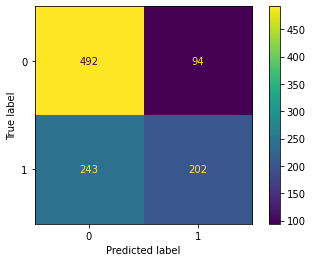

In [198]:
plot_confusion_matrix(lor,x_train,y_train);


In [199]:
print(classification_report(y_train, ytrain_pred_lor))

              precision    recall  f1-score   support

           0       0.67      0.84      0.74       586
           1       0.68      0.45      0.55       445

    accuracy                           0.67      1031
   macro avg       0.68      0.65      0.65      1031
weighted avg       0.68      0.67      0.66      1031



In [200]:
# Confusion matrix - Testing Data
confusion_matrix(y_test, ytest_pred_lor)

array([[214,  44],
       [ 92,  92]], dtype=int64)

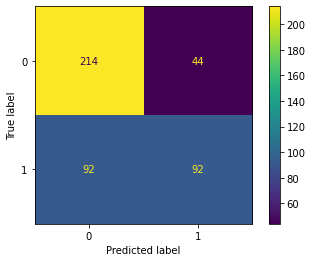

In [201]:
plot_confusion_matrix(lor,x_test,y_test);


In [202]:
print(classification_report(y_test, ytest_pred_lor))

              precision    recall  f1-score   support

           0       0.70      0.83      0.76       258
           1       0.68      0.50      0.58       184

    accuracy                           0.69       442
   macro avg       0.69      0.66      0.67       442
weighted avg       0.69      0.69      0.68       442



### AUC and ROC for the training data For Logistic Regression

AUC: 0.694


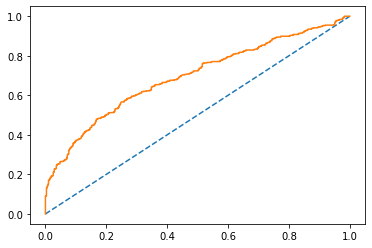

In [203]:
# predict probabilities
probs = lor.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### AUC and ROC for the testing data For Logistic Regression

AUC: 0.728


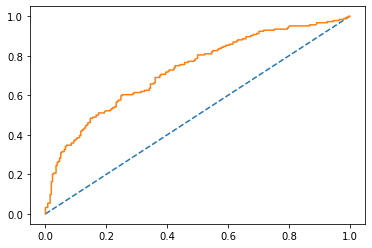

In [204]:
# predict probabilities
probs = lor.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

#### LDA

In [205]:
#ypredict for training data and testing data
ytrain_pred_lda = lda.predict(x_train)
ytest_pred_lda = lda.predict(x_test)

In [206]:
#Confusion Matrix for training data
confusion_matrix(y_train,ytrain_pred_lda)

array([[497,  89],
       [245, 200]], dtype=int64)

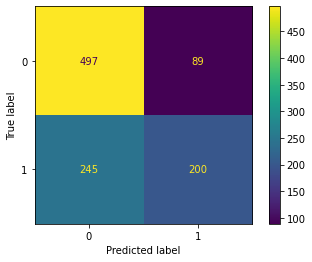

In [207]:
plot_confusion_matrix(lda, x_train,y_train)

In [208]:
print(classification_report(y_train, ytrain_pred_lda))

              precision    recall  f1-score   support

           0       0.67      0.85      0.75       586
           1       0.69      0.45      0.54       445

    accuracy                           0.68      1031
   macro avg       0.68      0.65      0.65      1031
weighted avg       0.68      0.68      0.66      1031



In [209]:
#Confusion matrix for testing data
confusion_matrix(y_test,ytest_pred_lda)

array([[217,  41],
       [ 94,  90]], dtype=int64)

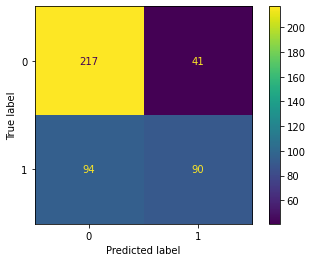

In [210]:
plot_confusion_matrix(lda,x_test,y_test)

In [211]:
print(classification_report(y_test, ytest_pred_lda))

              precision    recall  f1-score   support

           0       0.70      0.84      0.76       258
           1       0.69      0.49      0.57       184

    accuracy                           0.69       442
   macro avg       0.69      0.67      0.67       442
weighted avg       0.69      0.69      0.68       442



AUC: 0.693


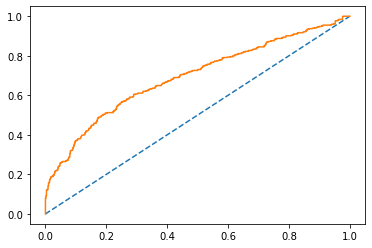

In [212]:
# predict probabilities
probs = lda.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.728


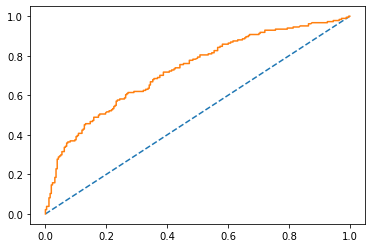

In [213]:
# predict probabilities
probs = lda.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

#### DecisionTreeClassifier

In [214]:
#predicting on training and testing data 
ypred_train_dtc = dtc.predict(x_train)
ypred_test_dtc = dtc.predict(x_test)

In [215]:
#Confusion matrix for training data 
confusion_matrix(y_train,ypred_train_dtc)

array([[409, 177],
       [196, 249]], dtype=int64)

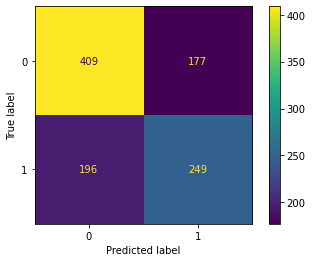

In [216]:
plot_confusion_matrix(dtc, x_train,y_train)

In [217]:
print(classification_report(y_train, ypred_train_dtc))

              precision    recall  f1-score   support

           0       0.68      0.70      0.69       586
           1       0.58      0.56      0.57       445

    accuracy                           0.64      1031
   macro avg       0.63      0.63      0.63      1031
weighted avg       0.64      0.64      0.64      1031



In [218]:
#Confusion matrix for testing data
confusion_matrix(y_test,ypred_test_dtc)

array([[258,   0],
       [  4, 180]], dtype=int64)

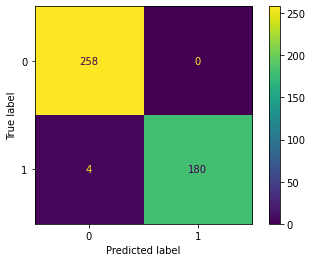

In [219]:
plot_confusion_matrix(dtc, x_test,y_test)

In [220]:
print(classification_report(y_test, ypred_test_dtc))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       258
           1       1.00      0.98      0.99       184

    accuracy                           0.99       442
   macro avg       0.99      0.99      0.99       442
weighted avg       0.99      0.99      0.99       442



AUC: 0.626


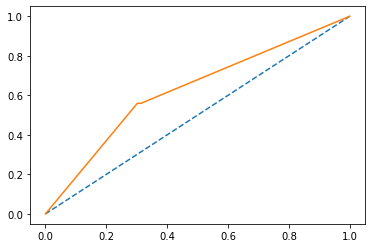

In [221]:
#AUC Curve for training data 
# predict probabilities
probs = dtc.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 1.000


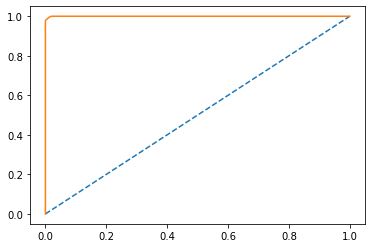

In [222]:
# predict probabilities
probs = dtc.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

#### Using grid optimization for decision tree model

In [223]:
y_train.shape[0]*0.03

30.93

In [224]:
param_grid = {
    'max_depth': [10,15,20,25,30],
    'min_samples_leaf': [20, 30,40],
    'min_samples_split': [50,70,90,120,130],
    'criterion' :['gini', 'entropy']
}

dtr=tree.DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtr, param_grid = param_grid, cv = 3)


grid_search.fit(x_train,y_train)

print(grid_search.best_params_)

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 40, 'min_samples_split': 50}


In [232]:
dtr_optimized = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_leaf=40, min_samples_split=50, random_state=123)

models=[dtr_optimized, dtr]

rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]

for i in models:
    i.fit(x_train,y_train)
    scores_train.append(i.score(x_train, y_train))
    scores_test.append(i.score(x_test, y_test))
    rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train))))
    rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test))))
   
        
        
print(pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Training Score':scores_train,'Test Score': scores_test},
            index=['Decision Tree Regressor optimized',"Decision Tree Regressor"]))

                                   Train RMSE  Test RMSE  Training Score  \
Decision Tree Regressor optimized    0.515521   0.531795        0.734239   
Decision Tree Regressor              0.128409   0.614677        0.983511   

                                   Test Score  
Decision Tree Regressor optimized    0.717195  
Decision Tree Regressor              0.622172  


In [233]:
ypred_optimized_train = dtr_optimized.predict(x_train)
print(classification_report(y_train, ypred_optimized_train))

              precision    recall  f1-score   support

           0       0.74      0.82      0.78       586
           1       0.72      0.63      0.67       445

    accuracy                           0.73      1031
   macro avg       0.73      0.72      0.72      1031
weighted avg       0.73      0.73      0.73      1031



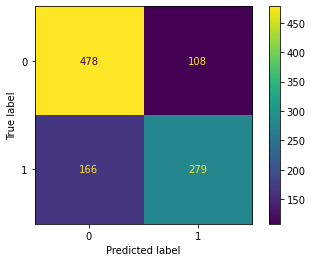

In [234]:
#Confusion Matrix for training data using optimized DTR
confusion_matrix(y_train,ypred_optimized_train)
plot_confusion_matrix(dtr_optimized, x_train,y_train)

In [235]:
ypred_optimized_test = dtr_optimized.predict(x_test)
print(classification_report(y_test, ypred_optimized_test))

              precision    recall  f1-score   support

           0       0.75      0.77      0.76       258
           1       0.66      0.65      0.66       184

    accuracy                           0.72       442
   macro avg       0.71      0.71      0.71       442
weighted avg       0.72      0.72      0.72       442



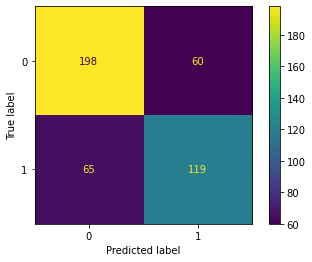

In [236]:
#Confusion Matrix for testing data using optimized DTR
ypred_optimized_test = dtr_optimized.predict(x_test)
confusion_matrix(y_test,ypred_optimized_test)
plot_confusion_matrix(dtr_optimized, x_test,y_test)

AUC: 0.793


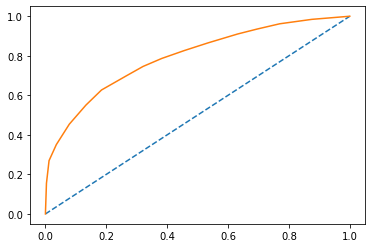

In [238]:
#AUC Curve for training data 
# predict probabilities
probs_o = dtr_optimized.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs_op = probs_o[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs_op)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs_op)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.754


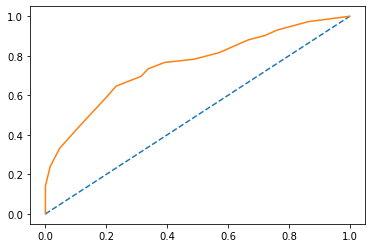

In [239]:
# predict probabilities
probs = dtr_optimized.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);